In [11]:
# Importation des bibliothèques colab
from google.colab import drive
from google.colab import files

In [12]:
#Accès à Google Drive
drive.mount('/gdrive/')

Drive already mounted at /gdrive/; to attempt to forcibly remount, call drive.mount("/gdrive/", force_remount=True).


In [13]:
# Importation des bibliothèques
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import (manifold, datasets, decomposition, ensemble,discriminant_analysis, random_projection, metrics, preprocessing)
from sklearn.cluster import (KMeans, DBSCAN)
from sklearn.cluster import AgglomerativeClustering
from matplotlib import offsetbox
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from scipy.cluster.hierarchy import dendrogram
import random
import datetime
from datetime import timedelta
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler

In [4]:
# Récupération des données
dataCustomers = pd.read_csv('/gdrive/My Drive/Data/p5data/olist_customers_dataset.csv')
dataGeolocation = pd.read_csv('/gdrive/My Drive/Data/p5data/olist_geolocation_dataset.csv')
dataOrderItems = pd.read_csv('/gdrive/My Drive/Data/p5data/olist_order_items_dataset.csv')
dataOrderPayments = pd.read_csv('/gdrive/My Drive/Data/p5data/olist_order_payments_dataset.csv')
dataOrderReviews = pd.read_csv('/gdrive/My Drive/Data/p5data/olist_order_reviews_dataset.csv')
dataOrders = pd.read_csv('/gdrive/My Drive/Data/p5data/olist_orders_dataset.csv')
dataProducts = pd.read_csv('/gdrive/My Drive/Data/p5data/olist_products_dataset.csv')
dataSellers = pd.read_csv('/gdrive/My Drive/Data/p5data/olist_sellers_dataset.csv')
dataTranslation = pd.read_csv('/gdrive/My Drive/Data/p5data/product_category_name_translation.csv')


In [14]:
# Affichage de toutes les colonnes et lignes lorsque demandé
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Exploration et nettoyage

## Fichier Customers

In [ ]:
# Premières lignes
dataCustomers.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP

Le forme du dataframe est (99441, 5)
Colonne : customer_id : 0 valeurs manquantes, ratio : 0.0
Colonne : customer_unique_id : 0 valeurs manquantes, ratio : 0.0
Colonne : customer_zip_code_prefix : 0 valeurs manquantes, ratio : 0.0
Colonne : customer_city : 0 valeurs manquantes, ratio : 0.0
Colonne : customer_state : 0 valeurs manquantes, ratio : 0.0
Le data frame comprends 0 valeurs manquantes au total soit un ratio de 0.0


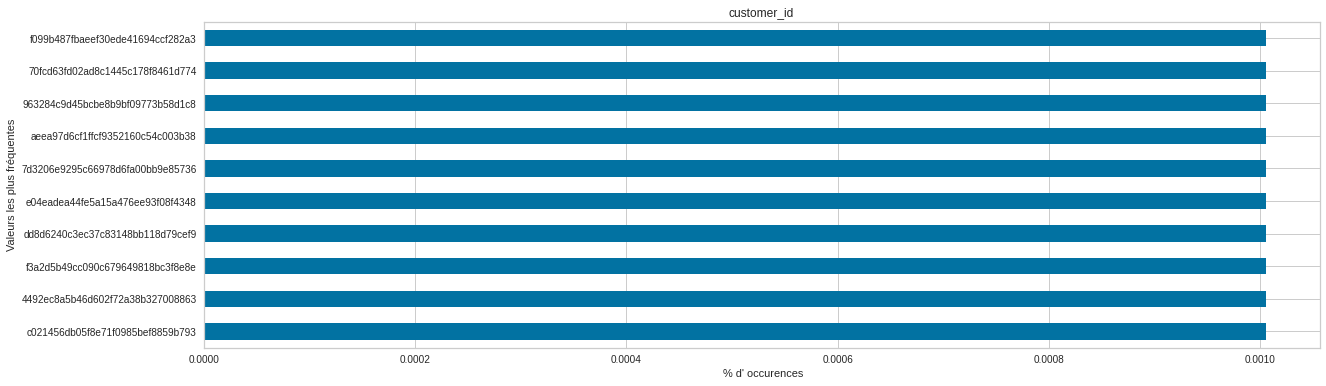

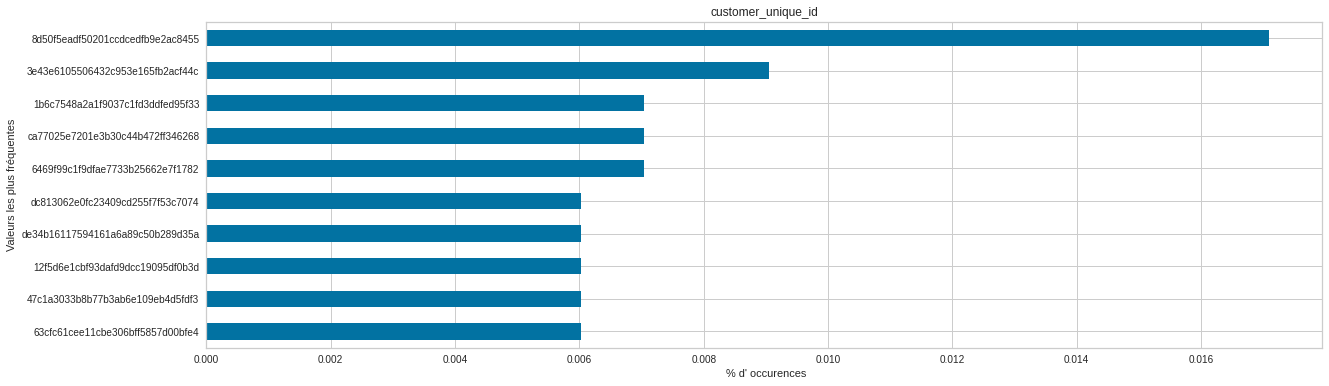

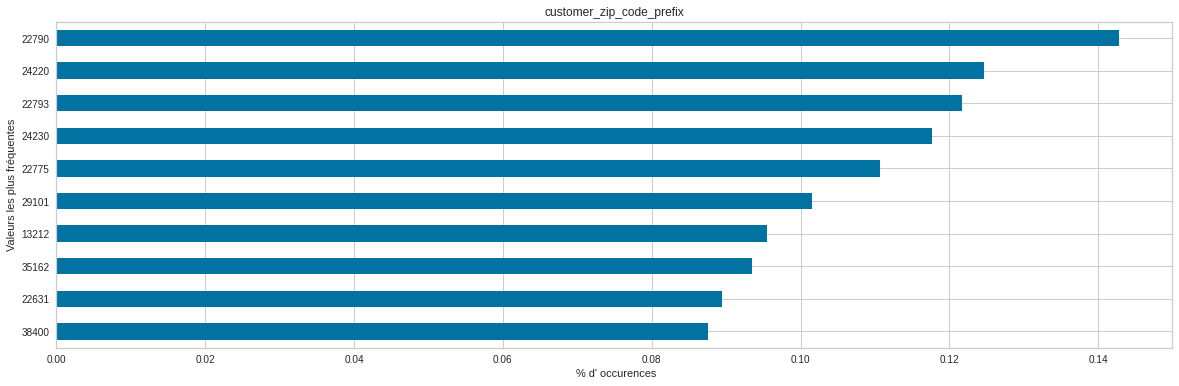

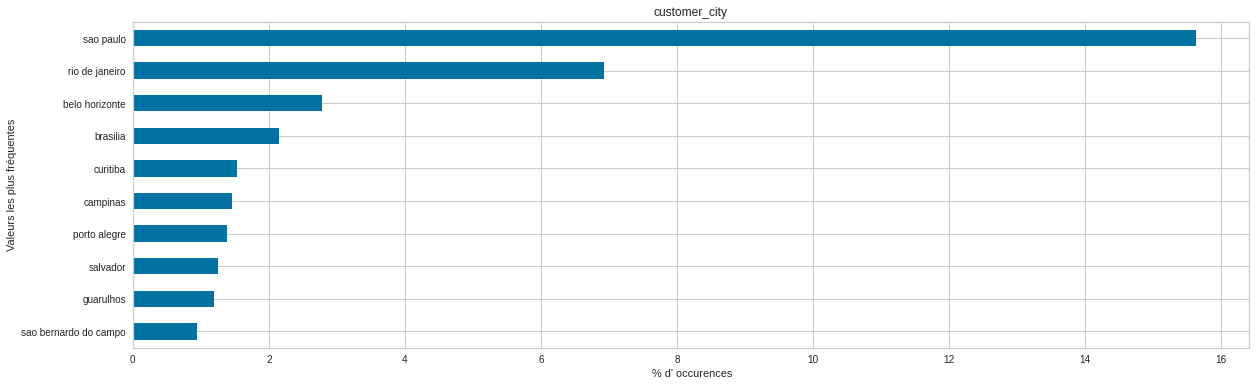

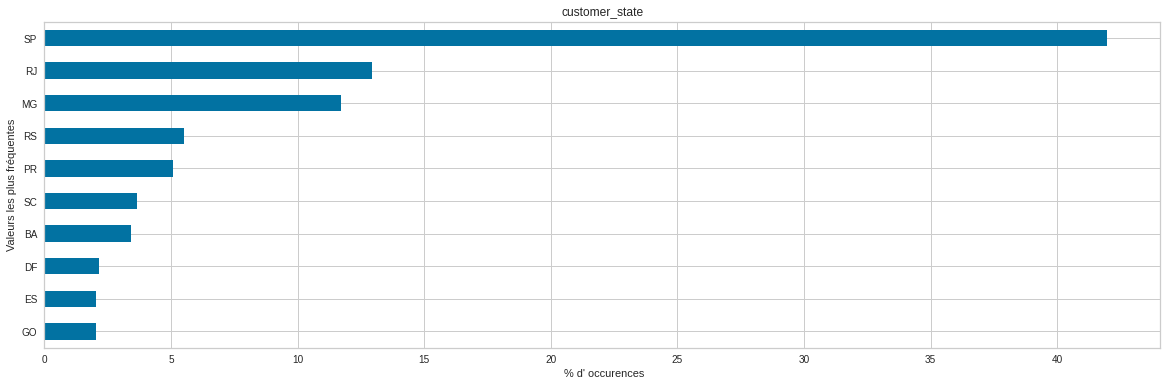

In [ ]:
# Affichage des informations essentielles de chaque fichiers
data = dataCustomers
print(f'Le forme du dataframe est {data.shape}')

# Affichage des valeurs manquantes par colonnes en nombre et en ratio
# Initialisation
missingValueNumber = 0
missingValueNumberTotal = 0
missingValuesList = list()

# Boucle de calcul et d'affichage par colonnes
for col in data :
    missingValueNumber = data[col].isna().sum()
    missingValueRatio = missingValueNumber / data[col].size
    print (f'Colonne : {col} : {missingValueNumber} valeurs manquantes, ratio : {round(missingValueRatio,2)}')
    missingValueNumberTotal = missingValueNumberTotal + missingValueNumber
    missingValuesList.append(missingValueRatio)

# Affichage des valeurs manquantes au total en nombre et en ratio
missingValueRatioTotal = missingValueNumberTotal / data.size
print(f'Le data frame comprends {missingValueNumberTotal} valeurs manquantes au total soit un ratio de {round(missingValueRatioTotal,2)}')

# Valeurs les plus fréquentes par colonne
for col in data.columns :
    # Barplot des valeurs les plus fréquentes
    # Comptage
    topValues = data[col].value_counts()/data.shape[0]*100
    # Mise en ordre
    topValues = topValues.sort_values(ascending=True)
    # Graphique à partir des 10 plus élevées
    plt.figure(figsize=(20,6))
    figDescription = topValues.tail(10).plot.barh()
    figDescription.set(xlabel=' % d\' occurences')
    figDescription.set(ylabel='Valeurs les plus fréquentes')
    figDescription.set(title=col)
    plt.show()

  

Le fichier Customers fourni des informations anonymisées sur la localisation des clients, à partir des informations ci-dessus, on apprend que :
- Il y a 99441 Observations pour 5 variables
- Il n'y a pas de valeurs manquantes
- Le customer_id est bien unique à chaque commande
- Le maximum de commande effectué par client est de 15
- Une bonne portion des commandes est envoyée à Sao Paulo
- Presque la moitié des clients sont de l'état de Sao Paulo

Si la localisation des clients n'est pas pertinente, alors le seul intérêt de ce fichier et de permettre d'identifier les clients en fonction des commandes et seulement si cette information ne peut être trouvée dans un autre fichier.



## Fichier Geolocation

In [ ]:
# Premières lignes
dataGeolocation.head()

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.545621       -46.639292   
1                         1046       -23.546081       -46.644820   
2                         1046       -23.546129       -46.642951   
3                         1041       -23.544392       -46.639499   
4                         1035       -23.541578       -46.641607   

  geolocation_city geolocation_state  
0        sao paulo                SP  
1        sao paulo                SP  
2        sao paulo                SP  
3        sao paulo                SP  
4        sao paulo                SP

Le forme du dataframe est (99441, 5)
Colonne : customer_id : 0 valeurs manquantes, ratio : 0.0
Colonne : customer_unique_id : 0 valeurs manquantes, ratio : 0.0
Colonne : customer_zip_code_prefix : 0 valeurs manquantes, ratio : 0.0
Colonne : customer_city : 0 valeurs manquantes, ratio : 0.0
Colonne : customer_state : 0 valeurs manquantes, ratio : 0.0
Le data frame comprends 0 valeurs manquantes au total soit un ratio de 0.0


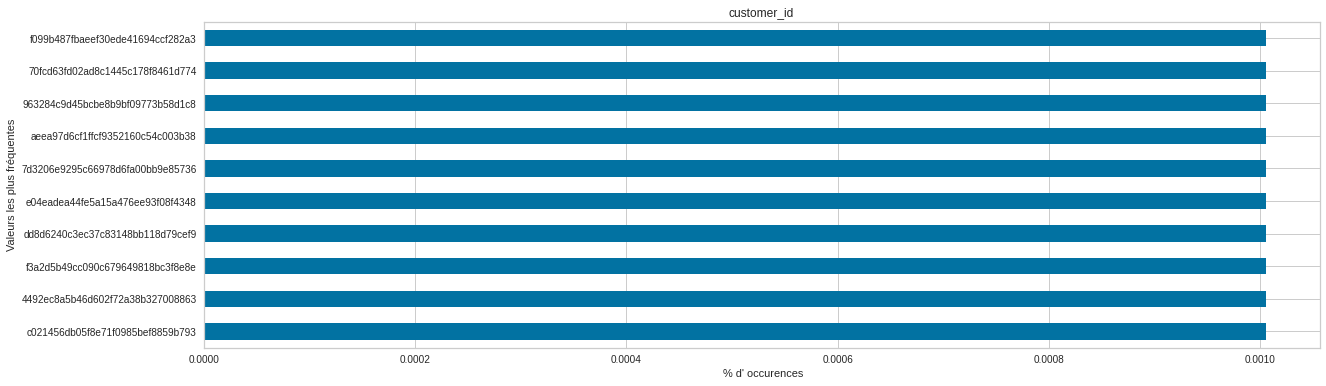

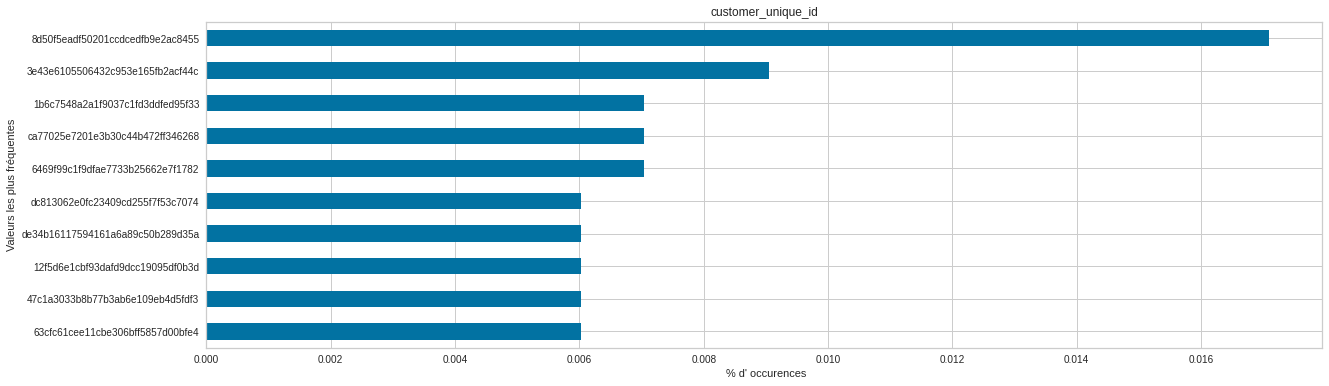

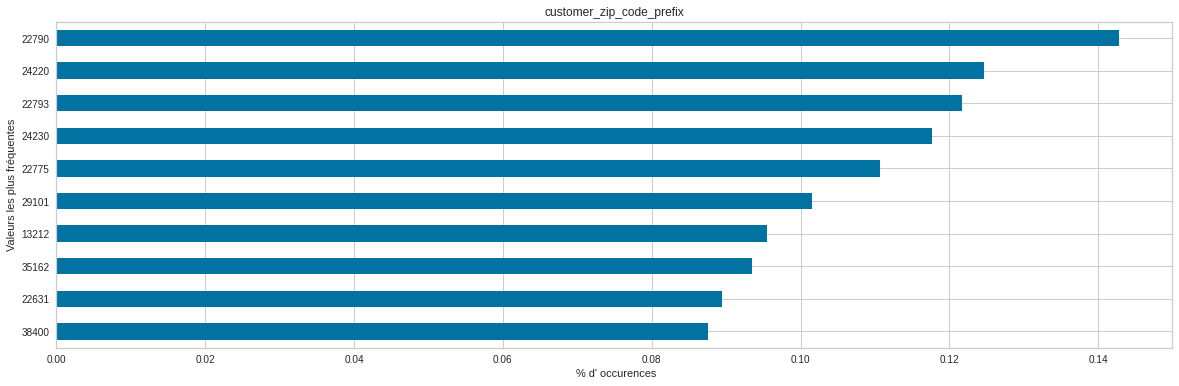

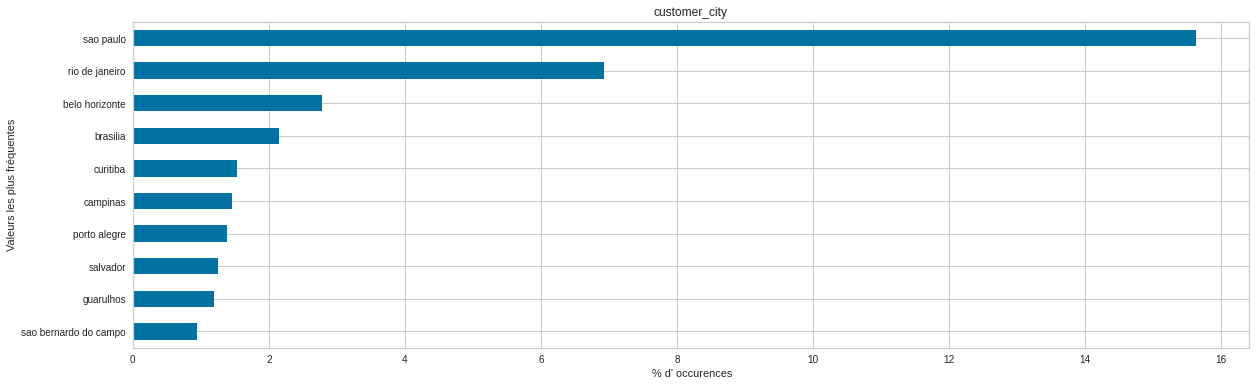

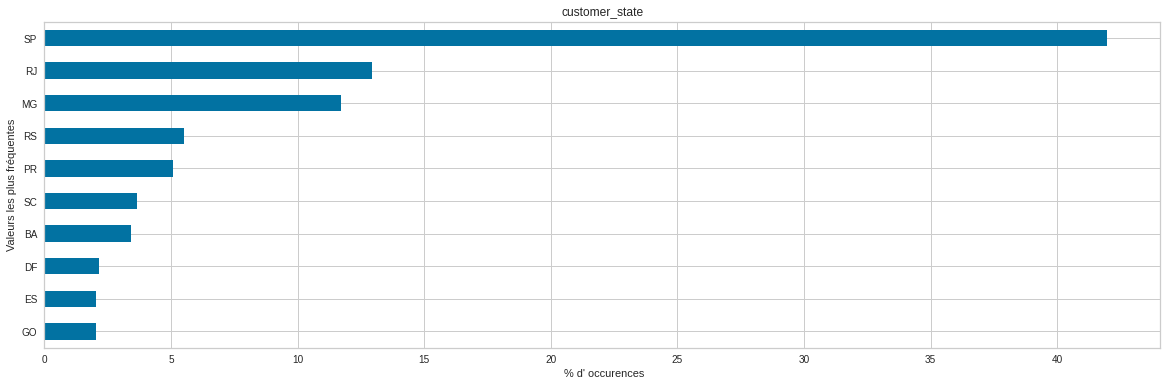

In [ ]:
# Affichage des informations essentielles de chaque fichiers
data = dataCustomers
print(f'Le forme du dataframe est {data.shape}')

# Affichage des valeurs manquantes par colonnes en nombre et en ratio
# Initialisation
missingValueNumber = 0
missingValueNumberTotal = 0
missingValuesList = list()

# Boucle de calcul et d'affichage par colonnes
for col in data :
    missingValueNumber = data[col].isna().sum()
    missingValueRatio = missingValueNumber / data[col].size
    print (f'Colonne : {col} : {missingValueNumber} valeurs manquantes, ratio : {round(missingValueRatio,2)}')
    missingValueNumberTotal = missingValueNumberTotal + missingValueNumber
    missingValuesList.append(missingValueRatio)

# Affichage des valeurs manquantes au total en nombre et en ratio
missingValueRatioTotal = missingValueNumberTotal / data.size
print(f'Le data frame comprends {missingValueNumberTotal} valeurs manquantes au total soit un ratio de {round(missingValueRatioTotal,2)}')

# Valeurs les plus fréquentes par colonne
for col in data.columns :
    # Barplot des valeurs les plus fréquentes
    # Comptage
    topValues = data[col].value_counts()/data.shape[0]*100
    # Mise en ordre
    topValues = topValues.sort_values(ascending=True)
    # Graphique à partir des 10 plus élevées
    plt.figure(figsize=(20,6))
    figDescription = topValues.tail(10).plot.barh()
    figDescription.set(xlabel=' % d\' occurences')
    figDescription.set(ylabel='Valeurs les plus fréquentes')
    figDescription.set(title=col)
    plt.show()


Le fichier Geolocation fourni des informations anonymisées sur la localisation des clients, à partir des informations ci-dessus, on apprend que :
- Il y a 1000163 Observations pour 5 variables
- Il n'y a pas de valeurs manquantes
- Il y a des informations redondantes avec le fichier Customers

Si la localisation des clients n'est pas pertinente, alors le fichier n'apporte pas plus d'informations que le précédent.



## Fichier OrderItems

In [ ]:
# Premières lignes
dataOrderItems.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90          19.93  
2  2018-01-18 14:48:30  199.00          17.87  
3  2018-08-15 10:10:18   12.99          12.79  
4  2017-02-13 13:57:51  199.90          18.14

Le forme du dataframe est (112650, 7)
Colonne : order_id : 0 valeurs manquantes, ratio : 0.0
Colonne : order_item_id : 0 valeurs manquantes, ratio : 0.0
Colonne : product_id : 0 valeurs manquantes, ratio : 0.0
Colonne : seller_id : 0 valeurs manquantes, ratio : 0.0
Colonne : shipping_limit_date : 0 valeurs manquantes, ratio : 0.0
Colonne : price : 0 valeurs manquantes, ratio : 0.0
Colonne : freight_value : 0 valeurs manquantes, ratio : 0.0
Le data frame comprends 0 valeurs manquantes au total soit un ratio de 0.0


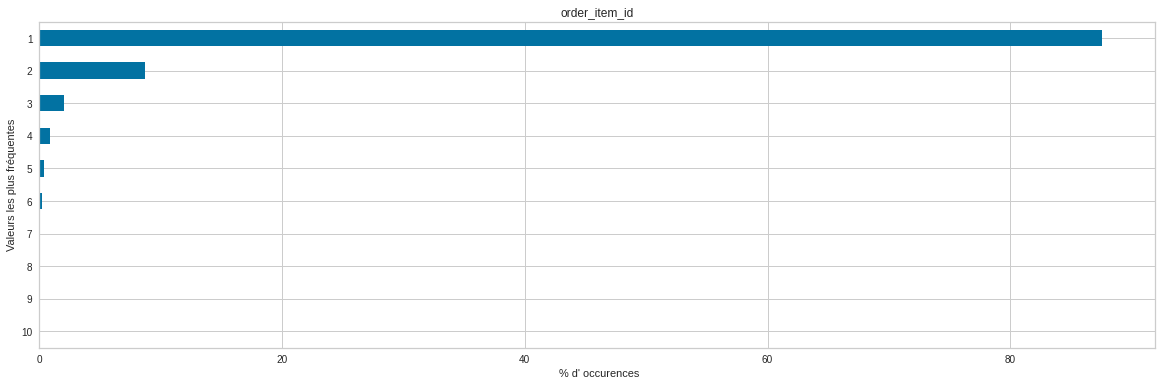

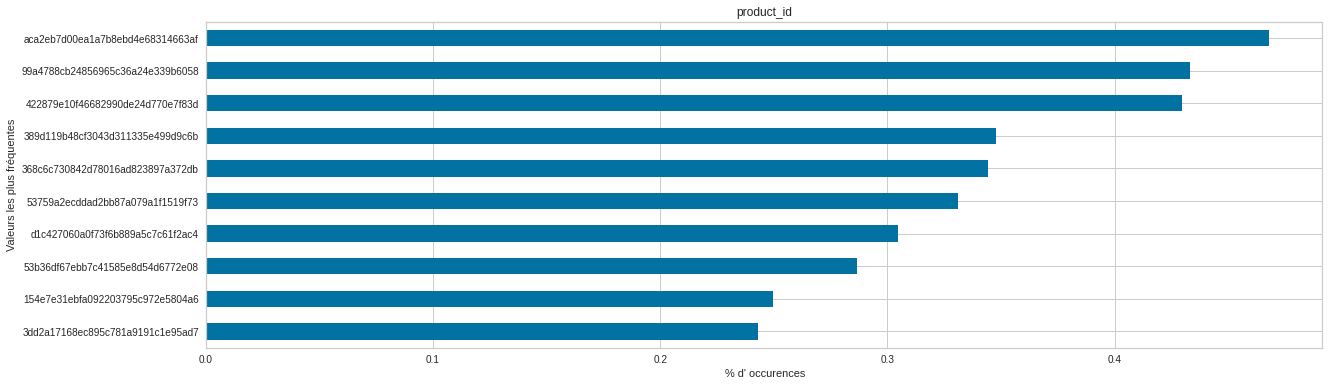

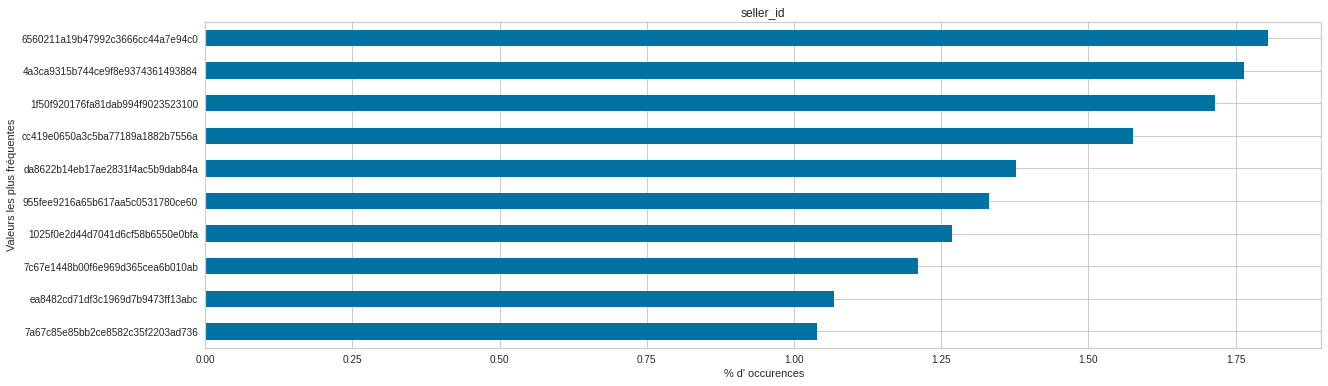

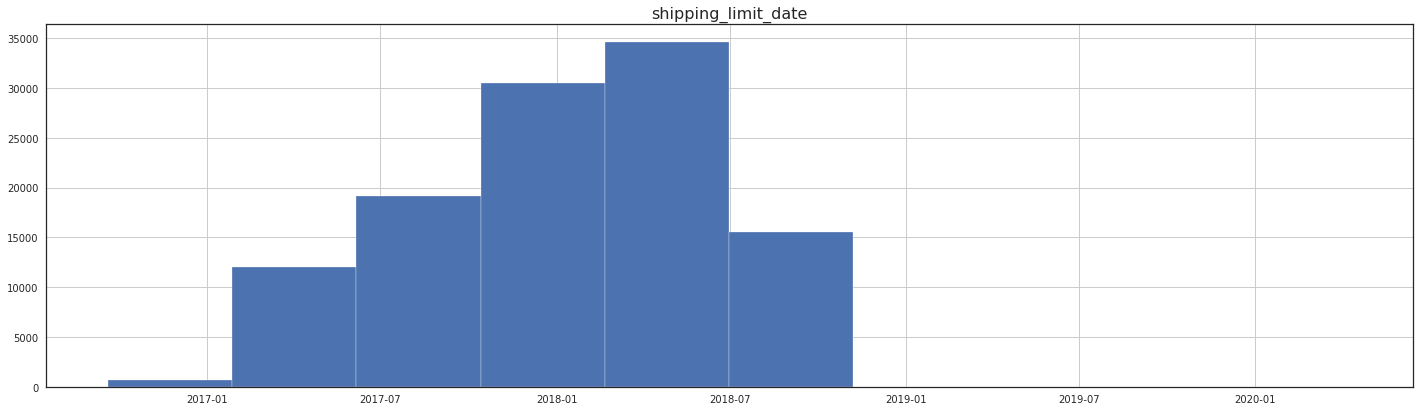

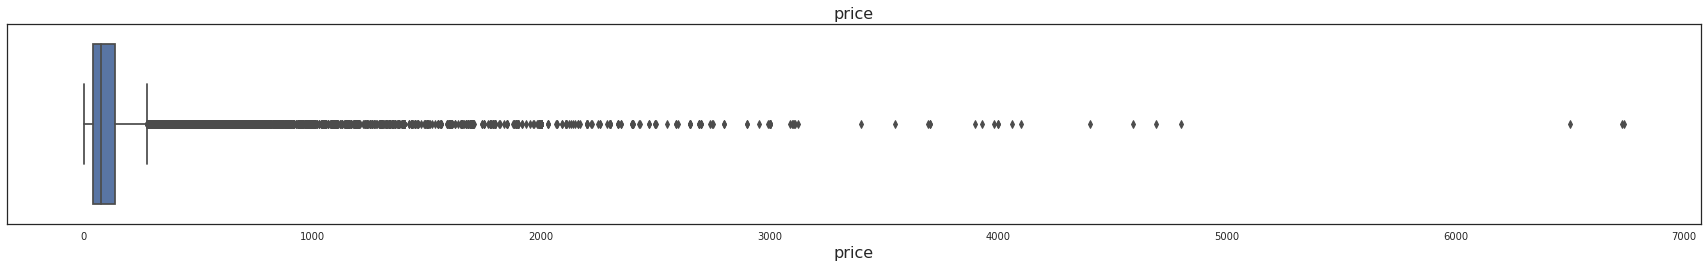

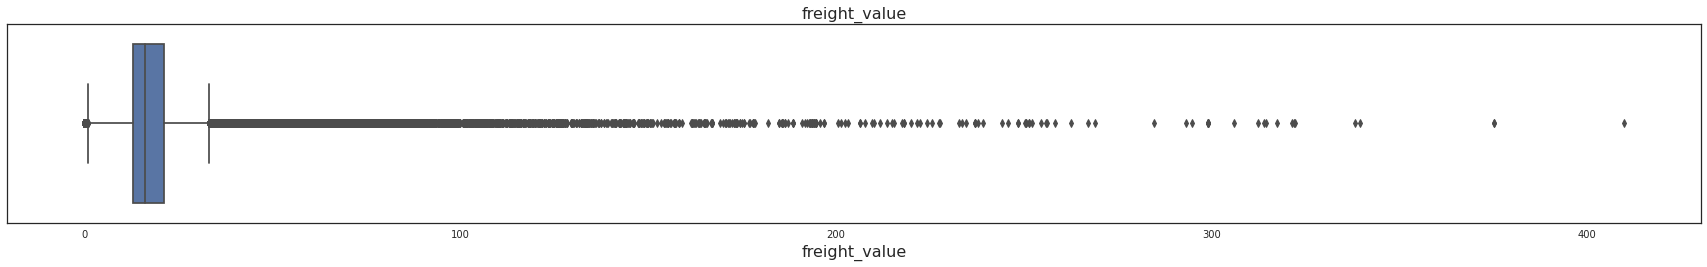

In [ ]:

# Affichage des informations essentielles de chaque fichiers
data = dataOrderItems
print(f'Le forme du dataframe est {data.shape}')

#Application de la fonction de transformation aux colonnes concernées
dataOrderItems['shipping_limit_date']= pd.to_datetime(dataOrderItems['shipping_limit_date'])

# Affichage des valeurs manquantes par colonnes en nombre et en ratio
# Initialisation
missingValueNumber = 0
missingValueNumberTotal = 0
missingValuesList = list()

# Boucle de calcul et d'affichage par colonnes
for col in data :
    missingValueNumber = data[col].isna().sum()
    missingValueRatio = missingValueNumber / data[col].size
    print (f'Colonne : {col} : {missingValueNumber} valeurs manquantes, ratio : {round(missingValueRatio,2)}')
    missingValueNumberTotal = missingValueNumberTotal + missingValueNumber
    missingValuesList.append(missingValueRatio)

# Affichage des valeurs manquantes au total en nombre et en ratio
missingValueRatioTotal = missingValueNumberTotal / data.size
print(f'Le data frame comprends {missingValueNumberTotal} valeurs manquantes au total soit un ratio de {round(missingValueRatioTotal,2)}')

# Graphiques
for col in data.columns[1:] :
  # Détermination du type de graphique à afficher
  if (data[col].dtypes==int or data[col].dtypes==float) and data[col].unique().size>=30 :
    # Graphique boxplot
    plt.figure(figsize=(24,4))
    sns.set({"font.size":16,"axes.titlesize":16,"axes.labelsize":16}, style='white')
    sns.boxplot(x=data[col], orient='h')
    plt.title(col)
    plt.tight_layout()
    plt.show()
  elif data[col].dtypes == '<M8[ns]':
    # Histogramme des valeurs groupées dans le cas d'une date
    plt.figure(figsize=(20,6))
    sns.set({"font.size":16,"axes.titlesize":16,"axes.labelsize":16}, style='white')
    data[col].hist()
    plt.title(col)
    plt.tight_layout()
    plt.show()
  else :
    # Barplot des valeurs les plus fréquentes
    # Comptage
    topValues = data[col].value_counts()/data.shape[0]*100
    # Mise en ordre
    topValues = topValues.sort_values(ascending=True)
    # Graphique à partir des 10 plus élevées
    plt.figure(figsize=(20,6))
    figDescription = topValues.tail(10).plot.barh()
    figDescription.set(xlabel=' % d\' occurences')
    figDescription.set(ylabel='Valeurs les plus fréquentes')
    figDescription.set(title=col)
    plt.show()

Le fichier OrderItem fourni des informations sur les produits achetés, à partir des informations ci-dessus, on apprend que :
- Il y a 112650 Observations pour 7 variables
- Il n'y a pas de valeurs manquantes
- Plus de 80% des commandes ne contiennent qu'un seul produit
- Les prix vont de 0 à près de 7000 BRL avec une distribution très dissymétrique, très peu de produits dépassant les 250 BRL.
- La valeur des envois par produit est estimée entre 0 et un peu plus de 400 BRL avec très peu d'envois dépassants une valeur de 35 BRL. Il y a également une distribution très dissymétrique.
- Les dates limite de livraison s'étalent sur deux ans avec des outliers qui vont jusqu'en 2020.


Le fichier apporte des information importantes sur l'identification des produits, des vendeurs et le coût des produits. Il pourra permettre de classifier les acheteurs entre autres par montants d'achats, nombres de produits et types de produits achetés.



## Fichier OrderPayments

In [ ]:
# Premières lignes
dataOrderPayments.head()

order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71  
3                     8         107.78  
4                     2         128.45

Le forme du dataframe est (103886, 5)
Colonne : order_id : 0 valeurs manquantes, ratio : 0.0
Colonne : payment_sequential : 0 valeurs manquantes, ratio : 0.0
Colonne : payment_type : 0 valeurs manquantes, ratio : 0.0
Colonne : payment_installments : 0 valeurs manquantes, ratio : 0.0
Colonne : payment_value : 0 valeurs manquantes, ratio : 0.0
Le data frame comprends 0 valeurs manquantes au total soit un ratio de 0.0


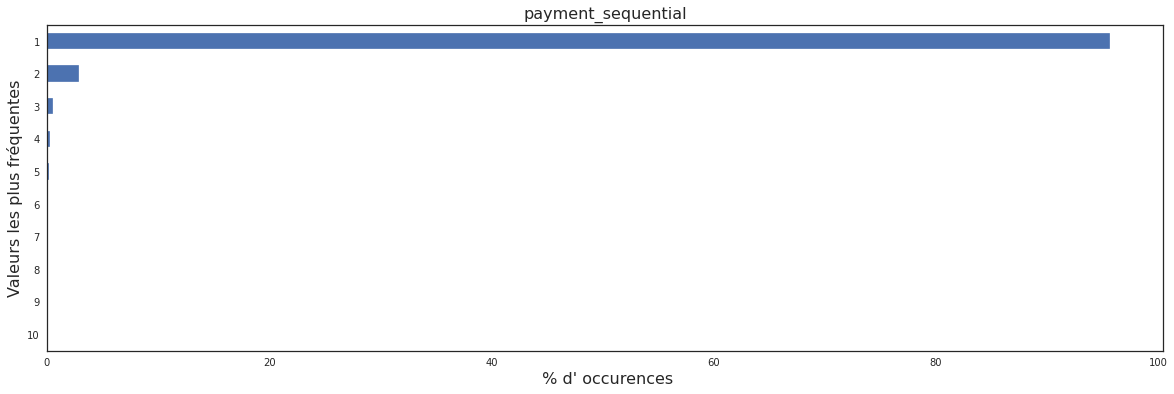

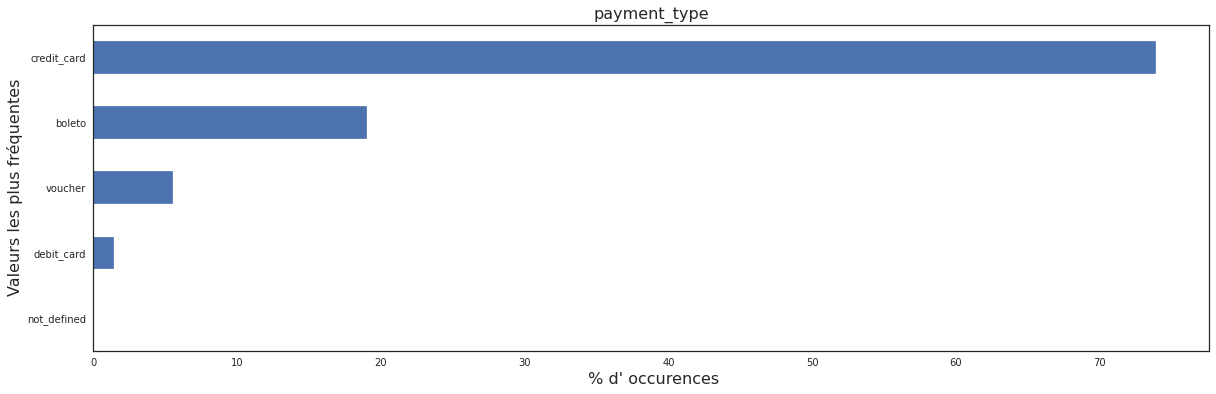

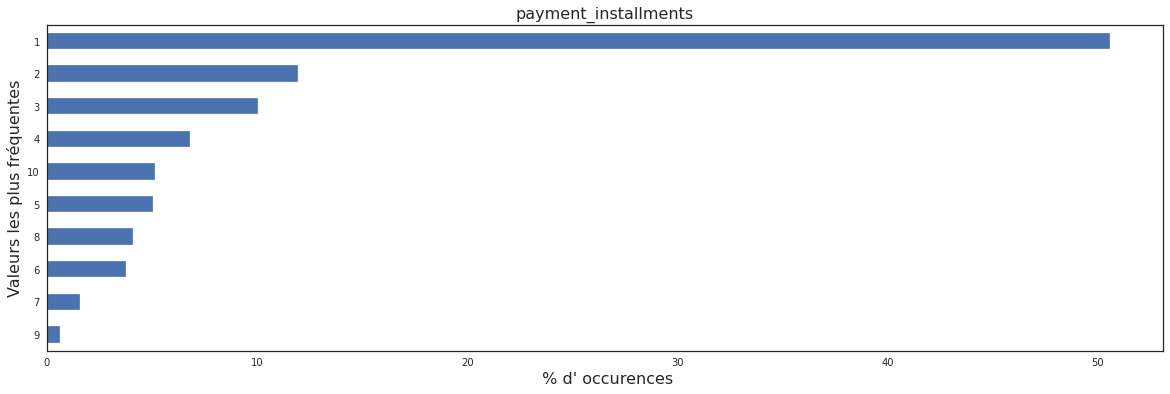

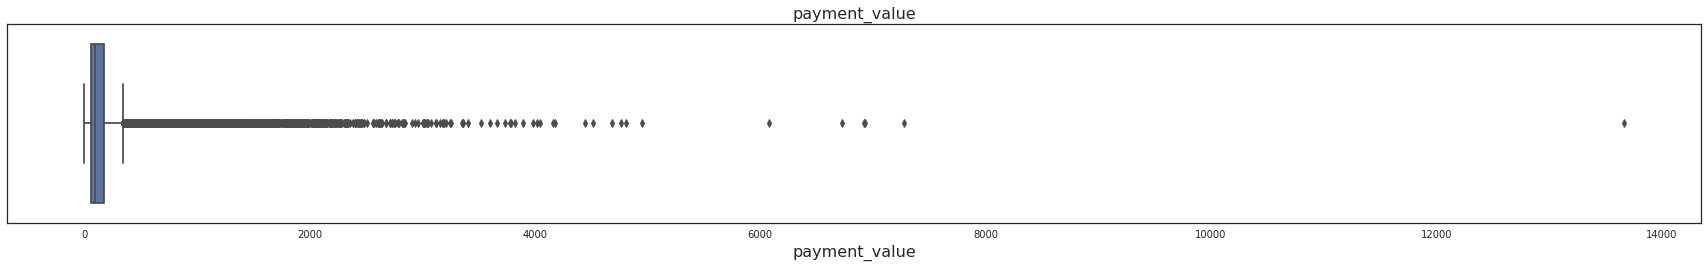

In [ ]:
# Affichage des informations essentielles de chaque fichiers
data = dataOrderPayments
print(f'Le forme du dataframe est {data.shape}')

# Affichage des valeurs manquantes par colonnes en nombre et en ratio
# Initialisation
missingValueNumber = 0
missingValueNumberTotal = 0
missingValuesList = list()

# Boucle de calcul et d'affichage par colonnes
for col in data :
    missingValueNumber = data[col].isna().sum()
    missingValueRatio = missingValueNumber / data[col].size
    print (f'Colonne : {col} : {missingValueNumber} valeurs manquantes, ratio : {round(missingValueRatio,2)}')
    missingValueNumberTotal = missingValueNumberTotal + missingValueNumber
    missingValuesList.append(missingValueRatio)

# Affichage des valeurs manquantes au total en nombre et en ratio
missingValueRatioTotal = missingValueNumberTotal / data.size
print(f'Le data frame comprends {missingValueNumberTotal} valeurs manquantes au total soit un ratio de {round(missingValueRatioTotal,2)}')

# Graphiques
for col in data.columns[1:] :
  # Détermination du type de graphique à afficher
  if (data[col].dtypes==int or data[col].dtypes==float) and data[col].unique().size>=30 :
    # Graphique boxplot
    plt.figure(figsize=(24,4))
    sns.set({"font.size":16,"axes.titlesize":16,"axes.labelsize":16}, style='white')
    sns.boxplot(x=data[col], orient='h')
    plt.title(col)
    plt.tight_layout()
    plt.show()
  elif data[col].dtypes == '<M8[ns]':
    # Histogramme des valeurs groupées dans le cas d'une date
    plt.figure(figsize=(20,6))
    sns.set({"font.size":16,"axes.titlesize":16,"axes.labelsize":16}, style='white')
    data[col].hist()
    plt.title(col)
    plt.tight_layout()
    plt.show()
  else :
    # Barplot des valeurs les plus fréquentes
    # Comptage
    topValues = data[col].value_counts()/data.shape[0]*100
    # Mise en ordre
    topValues = topValues.sort_values(ascending=True)
    # Graphique à partir des 10 plus élevées
    plt.figure(figsize=(20,6))
    figDescription = topValues.tail(10).plot.barh()
    figDescription.set(xlabel=' % d\' occurences')
    figDescription.set(ylabel='Valeurs les plus fréquentes')
    figDescription.set(title=col)
    plt.show()

Le fichier OrderPayments fourni des informations sur le paiement des commandes, à partir des informations ci-dessus, on apprend que :
- Il y a 103886 Observations pour 5 variables
- Il n'y a pas de valeurs manquantes
- Plus de 95% des commandes sont réglées avec un seul type de paiement
- Les paiements se font essentiellement par carte de crédit, puis grâce au Boleto Bancário, un système de paiement par espèce. Les bons d'achats et les cartes de débit constituent moins de 10% des types de paiement utilisés.
- 50 % des paiements sont effectués comptant
- La valeur totale des commandes suis une distribution très dissymétrique avec un maximum à près de 14000 BRL


Le fichier apporte des information importantes sur les modalités de paiement et les montants dépensés.


## Fichier OrderReviews

In [ ]:
# Premières lignes
dataOrderReviews.head()

review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN  2018-01-18 00:00:00   
1                                                NaN  2018-03-10 00:00:00   
2                                                NaN  2018-02-17 00:00:00   
3              Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4  Parabéns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   

  review_answer_timestamp  
0     2018-01-18 21:46:59  
1     2018-03-11 03:05:13  
2     2018-02-18 14:36:24  
3     2017-04-21 22:02:06  
4     2018-03-02 10:26:53

Le forme du dataframe est (100000, 7)
Colonne : review_id : 0 valeurs manquantes, ratio : 0.0
Colonne : order_id : 0 valeurs manquantes, ratio : 0.0
Colonne : review_score : 0 valeurs manquantes, ratio : 0.0
Colonne : review_comment_title : 88285 valeurs manquantes, ratio : 0.88
Colonne : review_comment_message : 58247 valeurs manquantes, ratio : 0.58
Colonne : review_creation_date : 0 valeurs manquantes, ratio : 0.0
Colonne : review_answer_timestamp : 0 valeurs manquantes, ratio : 0.0
Le data frame comprends 146532 valeurs manquantes au total soit un ratio de 0.21


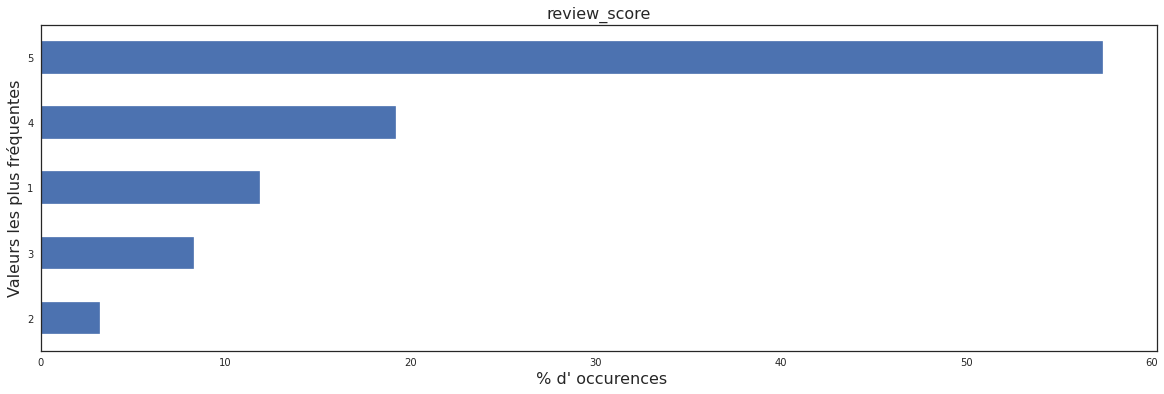

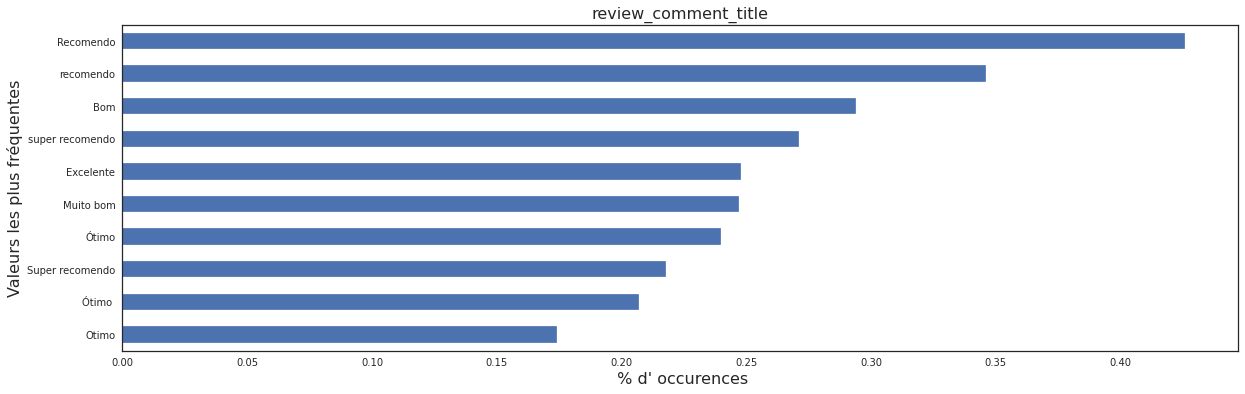

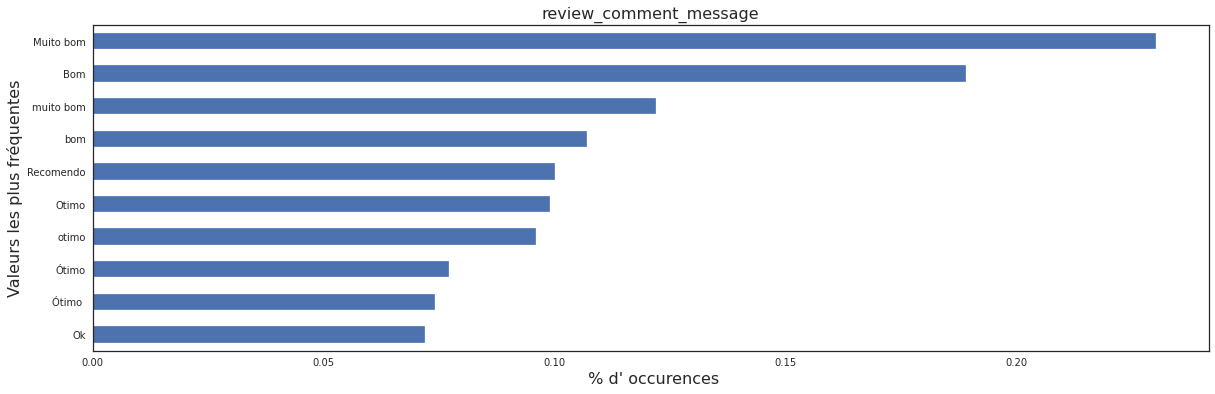

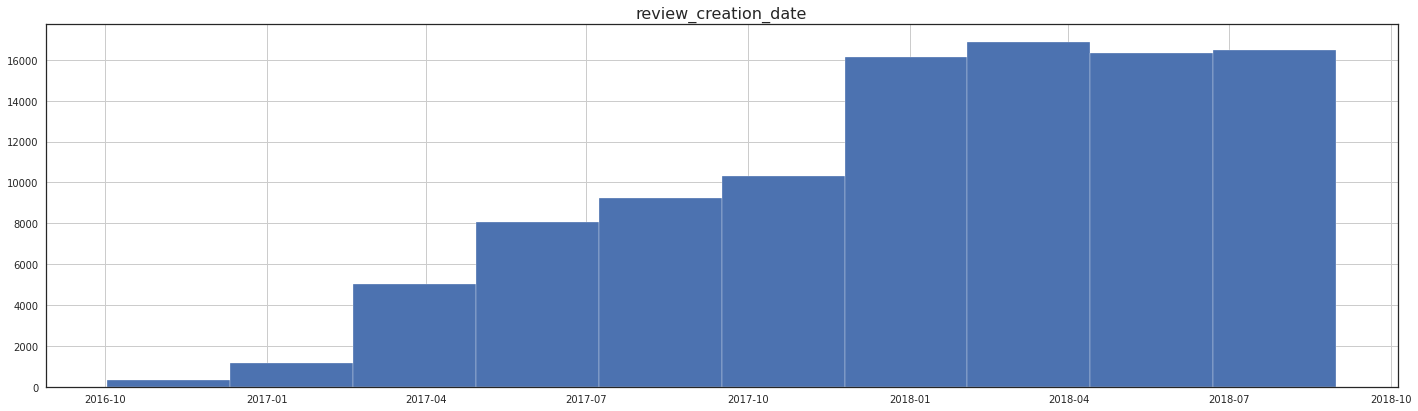

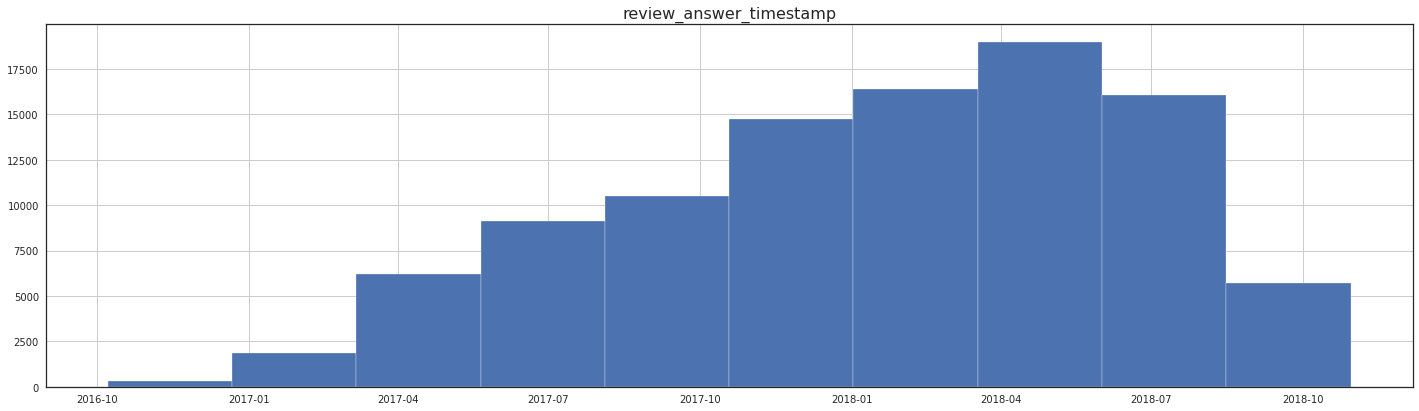

In [ ]:
# Affichage des informations essentielles de chaque fichiers
data = dataOrderReviews
print(f'Le forme du dataframe est {data.shape}')

#Application de la fonction de transformation aux colonnes concernées
dataOrderReviews['review_answer_timestamp']= pd.to_datetime(dataOrderReviews['review_answer_timestamp'])
dataOrderReviews['review_creation_date']= pd.to_datetime(dataOrderReviews['review_creation_date'])


# Affichage des valeurs manquantes par colonnes en nombre et en ratio
# Initialisation
missingValueNumber = 0
missingValueNumberTotal = 0
missingValuesList = list()

# Boucle de calcul et d'affichage par colonnes
for col in data :
    missingValueNumber = data[col].isna().sum()
    missingValueRatio = missingValueNumber / data[col].size
    print (f'Colonne : {col} : {missingValueNumber} valeurs manquantes, ratio : {round(missingValueRatio,2)}')
    missingValueNumberTotal = missingValueNumberTotal + missingValueNumber
    missingValuesList.append(missingValueRatio)

# Affichage des valeurs manquantes au total en nombre et en ratio
missingValueRatioTotal = missingValueNumberTotal / data.size
print(f'Le data frame comprends {missingValueNumberTotal} valeurs manquantes au total soit un ratio de {round(missingValueRatioTotal,2)}')

# Graphiques
for col in data.columns[2:] :
  # Détermination du type de graphique à afficher
  if (data[col].dtypes==int or data[col].dtypes==float) and data[col].unique().size>=10 :
    # Graphique boxplot
    plt.figure(figsize=(24,4))
    sns.set({"font.size":16,"axes.titlesize":16,"axes.labelsize":16}, style='white')
    sns.boxplot(x=data[col], orient='h')
    plt.title(col)
    plt.tight_layout()
    plt.show()
  elif data[col].dtypes == '<M8[ns]':
    # Histogramme des valeurs groupées dans le cas d'une date
    plt.figure(figsize=(20,6))
    sns.set({"font.size":16,"axes.titlesize":16,"axes.labelsize":16}, style='white')
    data[col].hist()
    plt.title(col)
    plt.tight_layout()
    plt.show()
  else :
    # Barplot des valeurs les plus fréquentes
    # Comptage
    topValues = data[col].value_counts()/data.shape[0]*100
    # Mise en ordre
    topValues = topValues.sort_values(ascending=True)
    # Graphique à partir des 10 plus élevées
    plt.figure(figsize=(20,6))
    figDescription = topValues.tail(10).plot.barh()
    figDescription.set(xlabel=' % d\' occurences')
    figDescription.set(ylabel='Valeurs les plus fréquentes')
    figDescription.set(title=col)
    plt.show()

Le fichier OrderReviews fourni des informations sur les avis de satisfaction des clients, à partir des informations ci-dessus, on apprend que :
- Il y a 100000 Observations pour 7 variables
- Il y a des valeurs manquantes sur le titre et le message des avis de satisfaction probablement car ces champs sont souvent laissés vides par les clients.
- La plupart des scores sont élevés avec néanmoins plus de 10% de score minimum.

Le fichier apporte des information importantes sur l'expérience client et peut permettre de relever le délai entre émission de l'avis et réponse du client.

## Fichier Orders

In [ ]:
# Premières lignes
dataOrders.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00  
2           2018-09-04 00:00:00  
3           2017-12-15 00:00:00  
4           2018-02-26 00:00:00

Le forme du dataframe est (99441, 8)
Colonne : order_id : 0 valeurs manquantes, ratio : 0.0
Colonne : customer_id : 0 valeurs manquantes, ratio : 0.0
Colonne : order_status : 0 valeurs manquantes, ratio : 0.0
Colonne : order_purchase_timestamp : 0 valeurs manquantes, ratio : 0.0
Colonne : order_approved_at : 160 valeurs manquantes, ratio : 0.0
Colonne : order_delivered_carrier_date : 1783 valeurs manquantes, ratio : 0.02
Colonne : order_delivered_customer_date : 2965 valeurs manquantes, ratio : 0.03
Colonne : order_estimated_delivery_date : 0 valeurs manquantes, ratio : 0.0
Le data frame comprends 4908 valeurs manquantes au total soit un ratio de 0.01


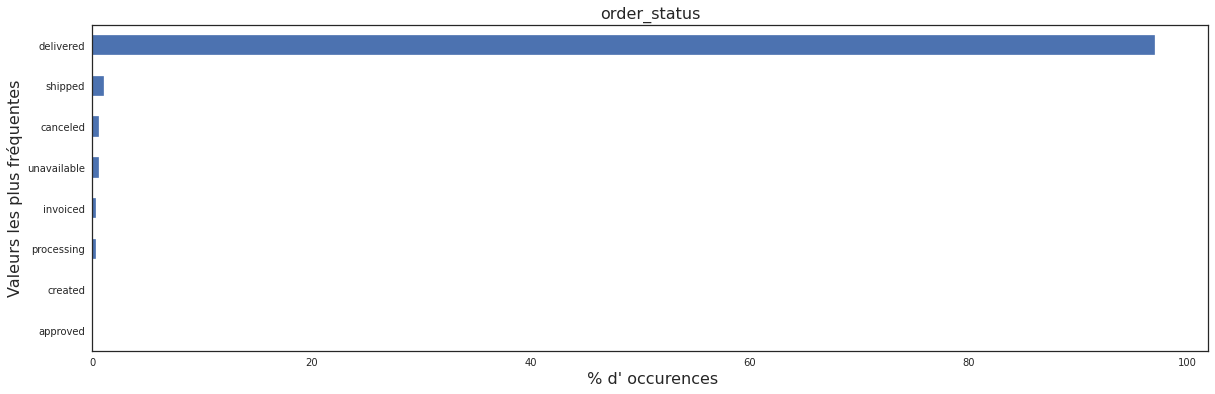

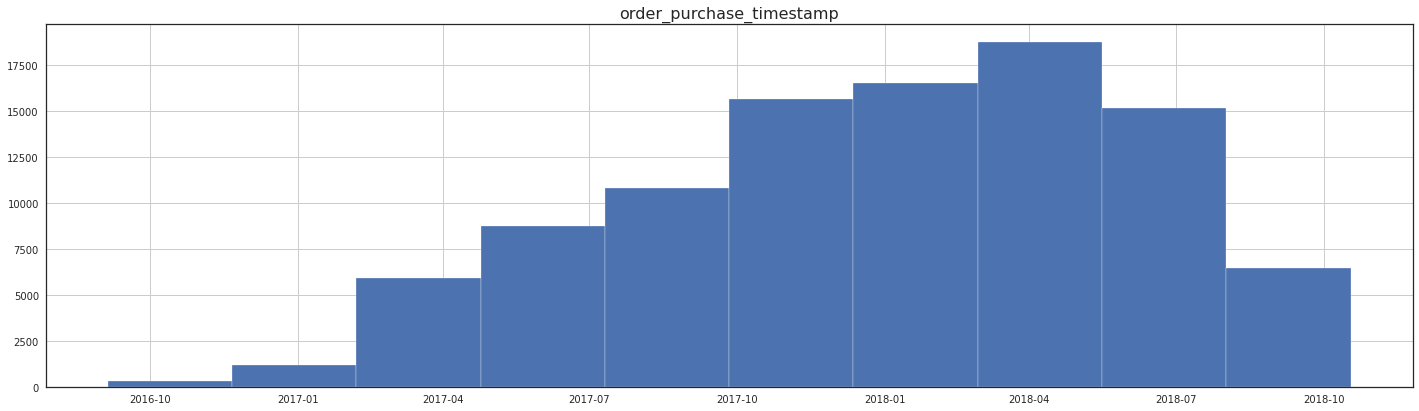

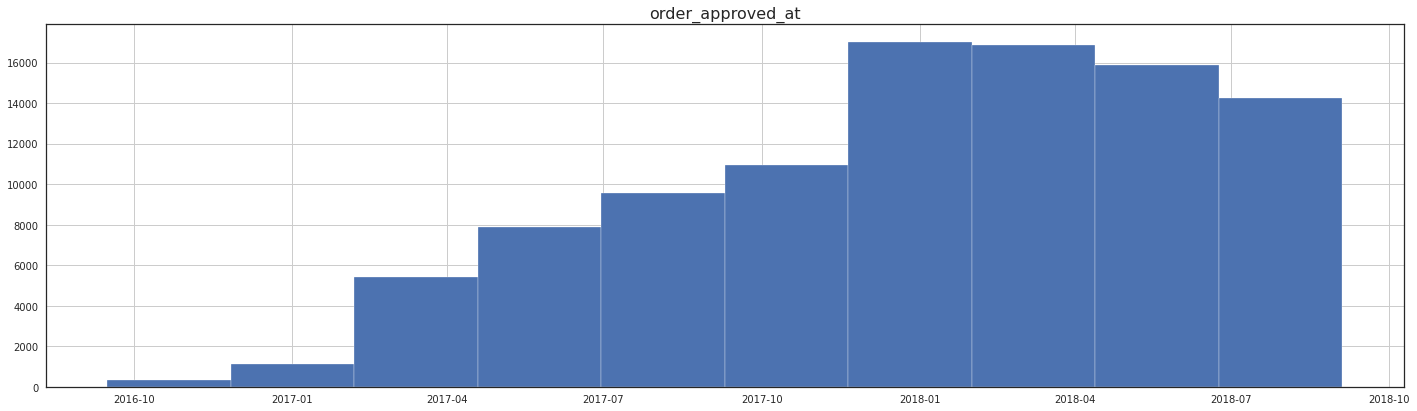

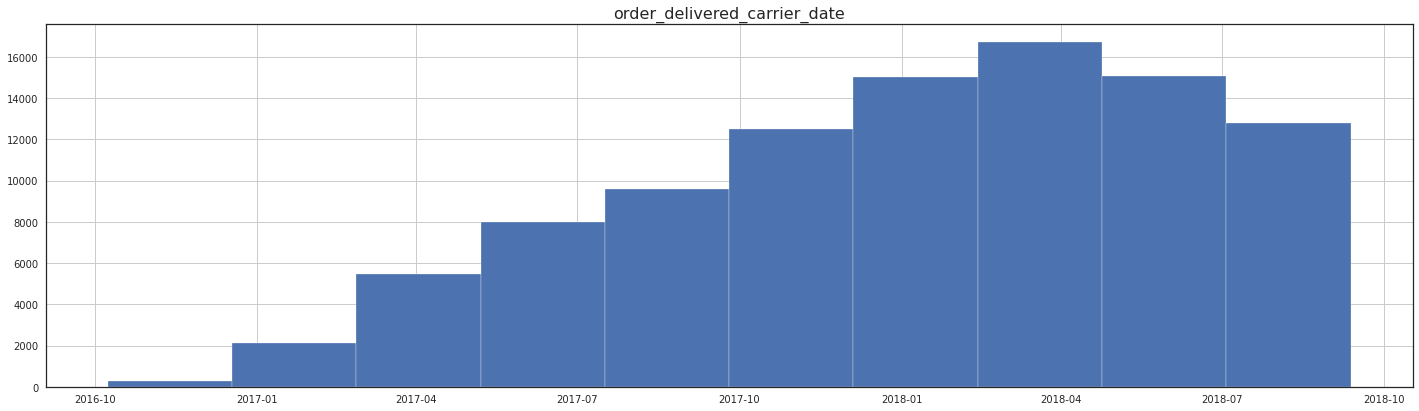

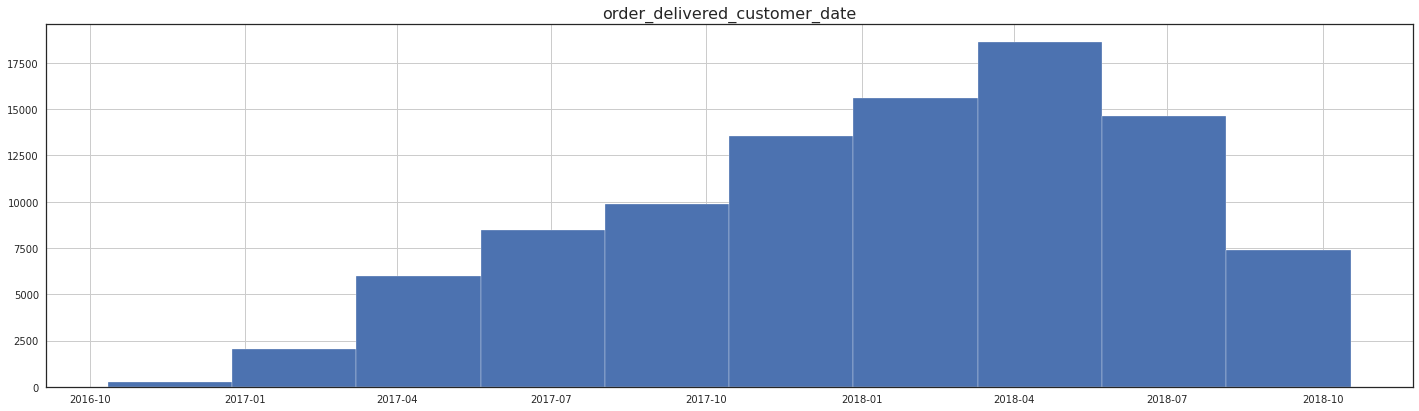

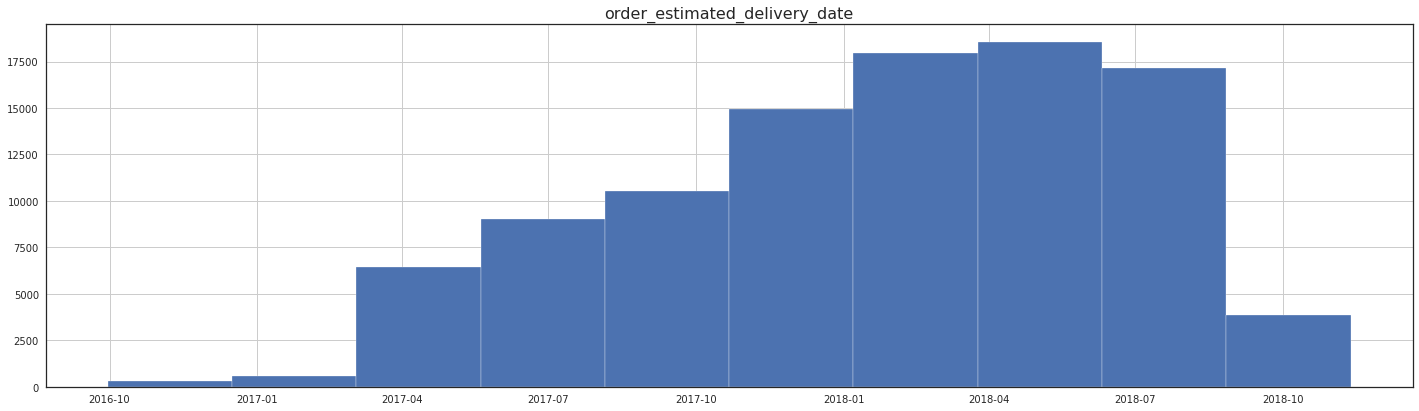

In [ ]:
# Affichage des informations essentielles de chaque fichiers
data = dataOrders
print(f'Le forme du dataframe est {data.shape}')

#Application de la fonction de transformation aux colonnes concernées
dataOrders['order_purchase_timestamp']= pd.to_datetime(dataOrders['order_purchase_timestamp'])
dataOrders['order_approved_at']= pd.to_datetime(dataOrders['order_approved_at'])
dataOrders['order_delivered_carrier_date']= pd.to_datetime(dataOrders['order_delivered_carrier_date'])
dataOrders['order_delivered_customer_date']= pd.to_datetime(dataOrders['order_delivered_customer_date'])
dataOrders['order_estimated_delivery_date']= pd.to_datetime(dataOrders['order_estimated_delivery_date'])

# Affichage des valeurs manquantes par colonnes en nombre et en ratio
# Initialisation
missingValueNumber = 0
missingValueNumberTotal = 0
missingValuesList = list()

# Boucle de calcul et d'affichage par colonnes
for col in data :
    missingValueNumber = data[col].isna().sum()
    missingValueRatio = missingValueNumber / data[col].size
    print (f'Colonne : {col} : {missingValueNumber} valeurs manquantes, ratio : {round(missingValueRatio,2)}')
    missingValueNumberTotal = missingValueNumberTotal + missingValueNumber
    missingValuesList.append(missingValueRatio)

# Affichage des valeurs manquantes au total en nombre et en ratio
missingValueRatioTotal = missingValueNumberTotal / data.size
print(f'Le data frame comprends {missingValueNumberTotal} valeurs manquantes au total soit un ratio de {round(missingValueRatioTotal,2)}')

# Graphiques
for col in data.columns[2:] :
  # Détermination du type de graphique à afficher
  if (data[col].dtypes==int or data[col].dtypes==float) and data[col].unique().size>=10 :
    # Graphique boxplot
    plt.figure(figsize=(24,4))
    sns.set({"font.size":16,"axes.titlesize":16,"axes.labelsize":16}, style='white')
    sns.boxplot(x=data[col], orient='h')
    plt.title(col)
    plt.tight_layout()
    plt.show()
  elif data[col].dtypes == '<M8[ns]':
    # Histogramme des valeurs groupées dans le cas d'une date
    plt.figure(figsize=(20,6))
    sns.set({"font.size":16,"axes.titlesize":16,"axes.labelsize":16}, style='white')
    data[col].hist()
    plt.title(col)
    plt.tight_layout()
    plt.show()
  else :
    # Barplot des valeurs les plus fréquentes
    # Comptage
    topValues = data[col].value_counts()/data.shape[0]*100
    # Mise en ordre
    topValues = topValues.sort_values(ascending=True)
    # Graphique à partir des 10 plus élevées
    plt.figure(figsize=(20,6))
    figDescription = topValues.tail(10).plot.barh()
    figDescription.set(xlabel=' % d\' occurences')
    figDescription.set(ylabel='Valeurs les plus fréquentes')
    figDescription.set(title=col)
    plt.show()

Le fichier Orders fourni des informations sur le statut et les dates des évènements clés des commandes, à partir des informations ci-dessus, on apprend que :
- Il y a 99441 Observations pour 8 variables
- Il y a un très petit nombre de valeurs manquantes probablement liées au fait que toutes les commandes n'étaient pas livrées arrivées à terme au moment de l'enregistrement du jeu de données. (cf statut processing, canceled, etc...)

Le fichier apporte des information importantes sur la temporalité des achats, les retards potentiel ou la fréquence.

# Sélection des variables, stratégie de feature engineering

Le fait qu'une très grande majorité des acheteurs n'ont fait qu'une seule commande et que les commandes n'ont généralement qu'un seul produit induit qu'il est inutile de retenir trop de variables liées à de multiples commandes ou produits achetés.

A partir des variables disponibles dans les fichiers, voici une liste de variable brutes ou raffinées possibles et un commentaire sur leur pertinence  :
Les variables marquées d'un X ne sont donc pas conservées car insuffisamment pertinentes, une étude extensive pourrait les inclure.

1 délai depuis le dernier achat

2 fréquence d'achat

3 nombre de commandes

4 nombre total de produits

X nombre moyen de produits par commande (peu de commandes multiples)

X montant moyen d'une commande (peu de commandes multiples)

5 montant total dépensé

6 review : note moyenne

X statut de la commande (peu de variations)

X moyens de paiement (peu pertinent)

X géolocalisation (peu pertinent)

X variabilité des catégories de produits et des vendeurs (peu d'achats de produits multiples ou de commandes multiples)

7 nombre moyen d'échéances de paiement

8-9-10 dépense par catégorie de produits

En ce qui concerne les catégories : il faut créer des ensembles de catégories pour limiter l'ajout de variables et augmenter leur impact, si certaines catégories ne rentrent pas dans les quelques ensembles proposés, elles seront ignorées car il n'y aurait pas vraiment d'utilité à créer un ensemble "Autres" qui n'aurait de toute façon pas ou très peu de valeur interprétable.

Ensembles de catégories :
-LeisureArtsCulture
-Home
-Pro





# Préparation du fichier de travail

In [ ]:
# Classification des catégories de produits en ensembles

# Dictionnaire de classification
dictCategories = {
# home
'furniture_living_room' : 'home',
'furniture_mattress_and_upholstery' : 'home',
'furniture_bedroom' : 'home',
'furniture_decor' : 'home',
'bed_bath_table' : 'home',
'kitchen_dining_laundry_garden_furniture' : 'home',
'la_cuisine' : 'home',
'home_confort' : 'home',
'home_comfort_2' : 'home',
'christmas_supplies' : 'home',
'small_appliances' : 'home',
'small_appliances_home_oven_and_coffee' : 'home',
'home_appliances_2' : 'home',
'home_appliances' : 'home',
'housewares' : 'home',
'telephony' : 'home',
'electronics': 'home',
'computers_accessories': 'home',
'consoles_games': 'home',
'fixed_telephony': 'home',
'audio': 'home',
'computers': 'home',
'tablets_printing_image': 'home',
'luggage_accessories': 'home',
'watches_gifts' : 'home',
'fashion_bags_accessories' : 'home',
'fashion_underwear_beach' : 'home',
'fashion_shoes' : 'home', 
'fashion_male_clothing' : 'home',
'fashio_female_clothing' : 'home',
'fashion_sport' : 'home',
'fashion_childrens_clothes' : 'home',
'health_beauty' : 'home', 
'baby': 'home',
'diapers_and_hygiene' : 'home',
'perfumery' : 'home',
'flowers' : 'home',
'pet_shop' : 'home',
'garden_tools' : 'home',
'food_drink' : 'home',
'food' : 'home',
'drinks' : 'home',

# Pro
'construction_tools_construction': 'pro',
'costruction_tools_garden': 'pro',
'costruction_tools_tools': 'pro',
'construction_tools_safety': 'pro',
'construction_tools_lights': 'pro',
'home_construction': 'pro',
'air_conditioning': 'pro',
'office_furniture' : 'pro',
'industry_commerce_and_business' : 'pro',
'stationery' : 'pro',
'agro_industry_and_commerce' : 'pro',
'signaling_and_security' : 'pro',
'furnitures' : 'pro',
'security_and_services' : 'pro',

# Leisure Arts Culture Sports
'sports_leisure' : 'culture',
'musical_instruments': 'culture',
'party_supplies': 'culture',
'books' : 'culture',
'books_imported': 'culture',
'books_general_interest': 'culture',
'books_technical': 'culture',
'art': 'culture',
'toys': 'culture',
'cine_photo': 'culture',
'cds_dvds_musicals': 'culture',
'music': 'culture',
'dvds_blu_ray': 'culture',
'arts_and_craftmanship': 'culture',

# other
'auto' : 'other',
'Unknown' : 'other',
'market_place' : 'other', 
'cool_stuff' : 'other'}

# Transformation du dictionnaire en dataframe
dataDict = pd.DataFrame(list(dictCategories.items()),columns = ['product_category_name_english','product_group'])

# Intégration des groupes de catégories dans le df dataTranslation
dataTranslation = dataTranslation.merge(dataDict,how='left', on='product_category_name_english')

# Intégration du df dataTranslation dans le df dataProducts
dataProducts = dataProducts.merge(dataTranslation, how='left', on='product_category_name')

# Intégration des groupes dans dataOrderItems
dataOrderItems = dataOrderItems.merge(dataProducts, how='left', on='product_id')

# Calcul des variables issues du feature engineering

In [ ]:
dataOrderItems.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

  shipping_limit_date   price  freight_value product_category_name  \
0 2017-09-19 09:45:35   58.90          13.29            cool_stuff   
1 2017-05-03 11:05:13  239.90          19.93              pet_shop   
2 2018-01-18 14:48:30  199.00          17.87      moveis_decoracao   
3 2018-08-15 10:10:18   12.99          12.79            perfumaria   
4 2017-02-13 13:57:51  199.90          18.14    ferramentas_jardim   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 58.0                       598.0                 4.0   
1                 56.0                       239.0                 2.0   
2                 59.0                       695.0                 2.0   
3                 42.0                       480.0                 1.0   
4                 59.0                       409.0                 1.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  \
0             650.0               28.0                9.0              14.0   
1           30000.0               50.0               30.0              40.0   
2            3050.0               33.0               13.0              33.0   
3             200.0               16.0               10.0              15.0   
4            3750.0               35.0               40.0              30.0   

  product_category_name_english product_group  
0                    cool_stuff         other  
1                      pet_shop          home  
2               furniture_decor          home  
3                     perfumery          home  
4                  garden_tools          home

In [ ]:
# Jointure de l'ensemble des fichiers utiles
data = dataOrders.merge(dataOrderPayments, how='left', on='order_id')
data = data.merge(dataOrderReviews, how='left', on='order_id')
data = data.merge(dataOrderItems, how='left', on='order_id')
data = data.merge(dataCustomers, how='left', on='customer_id')

In [ ]:
data.shape

(119151, 38)

In [ ]:
data.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
4  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
2    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
3    delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
4    delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2017-10-04 19:55:00           2017-10-10 21:25:13   
2          2017-10-04 19:55:00           2017-10-10 21:25:13   
3          2018-07-26 14:31:00           2018-08-07 15:27:45   
4          2018-08-08 13:50:00           2018-08-17 18:06:29   

  order_estimated_delivery_date  payment_sequential payment_type  \
0                    2017-10-18                 1.0  credit_card   
1                    2017-10-18                 3.0      voucher   
2                    2017-10-18                 2.0      voucher   
3                    2018-08-13                 1.0       boleto   
4                    2018-09-04                 1.0  credit_card   

   payment_installments  payment_value                         review_id  \
0                   1.0          18.12  a54f0611adc9ed256b57ede6b6eb5114   
1                   1.0           2.00  a54f0611adc9ed256b57ede6b6eb5114   
2                   1.0          18.59  a54f0611adc9ed256b57ede6b6eb5114   
3                   1.0         141.46  8d5266042046a06655c8db133d120ba5   
4                   3.0         179.12  e73b67b67587f7644d5bd1a52deb1b01   

   review_score review_comment_title  \
0             4                  NaN   
1             4                  NaN   
2             4                  NaN   
3             4     Muito boa a loja   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0  Não testei o produto ainda, mas ele veio corre...           2017-10-11   
1  Não testei o produto ainda, mas ele veio corre...           2017-10-11   
2  Não testei o produto ainda, mas ele veio corre...           2017-10-11   
3                               Muito bom o produto.           2018-08-08   
4                                                NaN           2018-08-18   

  review_answer_timestamp  order_item_id                        product_id  \
0     2017-10-12 03:43:48            1.0  87285b34884572647811a353c7ac498a   
1     2017-10-12 03:43:48            1.0  87285b34884572647811a353c7ac498a   
2     2017-10-12 03:43:48            1.0  87285b34884572647811a353c7ac498a   
3     2018-08-08 18:37:50            1.0  595fac2a385ac33a80bd5114aec74eb8   
4     2018-08-22 19:07:58            1.0  aa4383b373c6aca5d8797843e5594415   

                          seller_id shipping_limit_date   price  \
0  3504c0cb71d7fa48d967e0e4c94d59d9 2017-10-06 11:07:15   29.99   
1  3504c0cb71d7fa48d967e0e4c94d59d9 2017-10-06 11:07:15   29.99   
2  3504c0cb71d7fa48d967e0e4c94d59d9 2017-10-06 11:07:15   29.99   
3  289cdb325fb7e7f891c38608bf9e0962 2018-07-30 03:24:27  118.70   
4  4869f7a5dfa277a7dca6462dcf3b52b2 2018-08-13 08:55:23  159.90   

   freight_value  product_category_name  product_name_lenght  \
0           8.72  utilidades_domesticas                 40.0   
1           8.72  utilidades_domesticas                 40.0   
2           8.72  utilidades_domesticas                 40.0   
3          22.76             perfumaria                 29.0   
4          19.22             automotivo                 46.0  

In [ ]:
# Délai depuis le dernier achat
# Pour étudier les données temporelles, on base notre date de référence sur celle de l'achat le plus récent du dataset plus 1 jour
refDate = data['order_purchase_timestamp'].max() + timedelta(days = 1)
dataCalc = data[['customer_unique_id','order_purchase_timestamp']].groupby('customer_unique_id').max()
# Le délai depuis le dernier achat est calculé par rapport à la date de référence
dataCalc['order_purchase_timestamp'] = refDate - dataCalc['order_purchase_timestamp']
dataCalc['order_purchase_timestamp'] = (dataCalc['order_purchase_timestamp'] / np.timedelta64(1,'D')).astype(int)
# La colonne est renommée puis ré-intégrée dans le dataFrame
dataCalc.columns = ['lapsed_since_last_purchase']
data = data.merge(dataCalc, how='left', on='customer_unique_id')


In [ ]:
# Nombre de commandes
dataCalc = data[['customer_unique_id','order_id']].drop_duplicates()
dataCalc = dataCalc.groupby(['customer_unique_id'])['order_id'].count()
# La colonne est renommée puis ré-intégrée dans le dataFrame
dataCalc = dataCalc.rename('order_number')
data = data.merge(dataCalc, how='left', on='customer_unique_id')

In [ ]:
# Fréquence d'achat
# Recherche de la date du plus vieil achat
dataCalcFreq = data[['customer_unique_id','order_id','order_purchase_timestamp','order_number']].drop_duplicates()
dataCalcFreq2 = dataCalcFreq.groupby('customer_unique_id').min()
dataCalcFreq2 = dataCalcFreq2['order_purchase_timestamp']
dataCalcFreq2 = dataCalcFreq2.rename('first_purchase')
dataCalcFreq = dataCalcFreq.merge(dataCalcFreq2, how='left', on='customer_unique_id')
# Calcul de la durée depuis le premier achat
dataCalcFreq['since_first_purchase'] = refDate-dataCalcFreq['first_purchase']
dataCalcFreq['since_first_purchase'] = (dataCalcFreq['since_first_purchase'] / np.timedelta64(1,'D')).astype(int)
# Calcul de la fréquence d'achat (dans le cas où on voudrait limiter la fréquence aux seuls clients ayant effectué plusieurs achats, on pourrait enlever 1 à order_number dans l'opération)
dataCalcFreq['purchase_frequency'] = dataCalcFreq['order_number'] / dataCalcFreq['since_first_purchase']
# Intégration dans le dataframe de travail
data = data.merge(dataCalcFreq[['customer_unique_id','purchase_frequency']], how='left', on='customer_unique_id')


In [ ]:
# Nombre total de produits achetés
dataCalc = data[['customer_unique_id', 'order_item_id', 'order_id']].drop_duplicates()
dataCalc = dataCalc.groupby(['customer_unique_id']).count()
# La colonne est renommée puis ré-intégrée dans le dataFrame
dataCalc = dataCalc['order_item_id']
dataCalc = dataCalc.rename('total_product_number')
data = data.merge(dataCalc, how='left', on='customer_unique_id')

In [ ]:
# Montant total dépensé
dataCalc = data[['customer_unique_id','payment_value','order_id','payment_sequential']].drop_duplicates()
dataCalc = dataCalc[['customer_unique_id','payment_value']].groupby('customer_unique_id').sum()
# La colonne est renommée puis ré-intégrée dans le dataFrame
dataCalc = dataCalc.rename({'payment_value':'total_spent'}, axis=1)
data = data.merge(dataCalc, how='left', on='customer_unique_id')

In [ ]:
# Note d'avis moyenne
dataCalc = data[['customer_unique_id','order_id','review_score']].drop_duplicates()
dataCalc = dataCalc.groupby(['customer_unique_id']).mean()
# La colonne est renommée puis ré-intégrée dans le dataFrame
dataCalc = dataCalc['review_score']
dataCalc = dataCalc.rename('mean_review_score')
data = data.merge(dataCalc, how='left', on='customer_unique_id')

In [ ]:
# Nombre moyen d'échéances de paiement
dataCalc = data[['customer_unique_id','order_id','payment_sequential','payment_installments']].drop_duplicates()
dataCalc = dataCalc.groupby(['customer_unique_id']).mean()
# La colonne est renommée puis ré-intégrée dans le dataFrame
dataCalc = dataCalc['payment_installments']
dataCalc = dataCalc.rename('mean_payments_installments')
data = data.merge(dataCalc, how='left', on='customer_unique_id')

In [ ]:
# Dépense par catégorie de produits
dataCalc = data[['customer_unique_id','order_id','order_item_id','price','product_group']].drop_duplicates()
# Catégories
categories = dataCalc['product_group'].unique().tolist()
# Retrait des valeurs Nan
categories = [x for x in categories if str(x) != 'nan']
# Retrait du groupe Other (ce groupe n'est pas utile car son contenu n'est pas vraiment interprétable)
categories.remove('other')
# Création des colonnes et calcul
for item in categories :
  # Création de la condition pour .query()
  strToTest = str(f'product_group == \'{item}\'')
  # Echantillon d'une catégorie
  dataCalc2 = dataCalc.query(strToTest)
  # Calcul de la somme des prix par client
  dataCalc2 = dataCalc2[['customer_unique_id','price']].groupby('customer_unique_id').sum()
  # La colonne est renommée puis ré-intégrée dans le dataFrame de calcul
  dataCalc2 = dataCalc2.rename({'price':item}, axis=1)
  dataCalc = dataCalc.merge(dataCalc2, how='left', on='customer_unique_id')
# On remplace les Nan par 0 (pas de dépenses dans cette catégorie)
dataCalc.fillna(0, inplace=True)
# On retire les colonnes inutiles
del dataCalc['order_id']
del dataCalc['order_item_id']
del dataCalc['price']
del dataCalc['product_group']
# Les colonnes sont ré-intégrées dans le dataFrame de travail
data = data.merge(dataCalc, how='left', on='customer_unique_id')

# Nettoyage

## Nettoyage des colonnes inutiles

In [ ]:
# On ne conserve qu'une ligne par customer_unique_id
dataRaw = data.copy()
data = data[['customer_unique_id','lapsed_since_last_purchase','order_number','purchase_frequency','total_product_number','total_spent','mean_review_score','mean_payments_installments','home','pro','culture']].drop_duplicates(subset='customer_unique_id')
# On retire ensuite le customer_unique_id et on obtient un dataframe uniquement composé de variables exploitables
data = data[['lapsed_since_last_purchase','order_number','purchase_frequency','total_product_number','total_spent','mean_review_score','mean_payments_installments','home','pro','culture']]
# Les colonnes sont renommées pour être plus courtes (retiré du projet final)
#data = data.rename({'lapsed_since_last_purchase':'last_pur','order_number':'ord_nb','purchase_frequency':'freq','total_product_number':'tot_prod','mean_review_score':'review','mean_payments_installments':'installments','culture':'cult'})

# Traitement des outliers

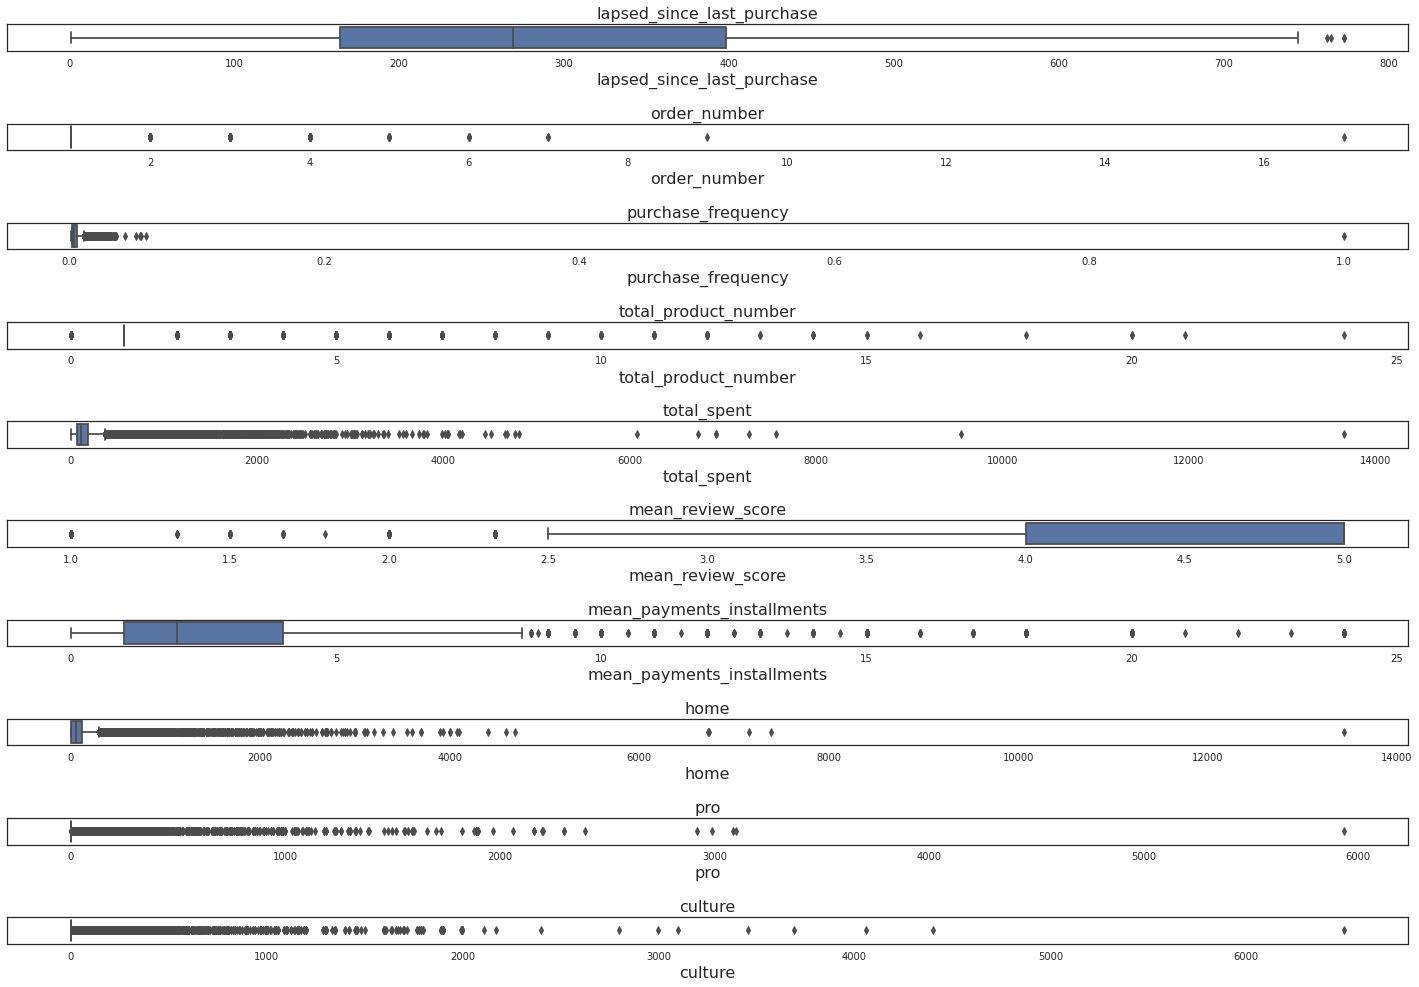

In [ ]:
# Graphiques boxplot de certains indicateurs
plt.figure(figsize=(20,14))
sns.set({"font.size":16,"axes.titlesize":16,"axes.labelsize":16}, style='white')

# Initialisation de la position du graphique
i=1
# Variables à afficher
featuresToBoxplot = data.columns

# Boucle permettant de créer un graphique par indicateur
for feature in featuresToBoxplot :
    # Emplacement itératif du graphique
    plt.subplot(data.shape[1],1,i)
    sns.boxplot(x=data[feature], orient='h')
    plt.title(feature)
    plt.tight_layout()
    # Incrémentation de la position
    i+=1

# Sauvegarde des graphiques
#plt.savefig('boxplot.png')

A partir des graphiques boxplot ci-dessous, on peut limiter la nécessité de traiter les outliers à "purchase frequency", "total spent", "home", "pro", "culture".

In [ ]:
# Suppression des observations présentant des valeurs supérieures ou inférieures de plusieurs fois l'écart type par rapport à la moyenne
# Bien que n'étant pas irréalistes, un petit nombre de ces valeurs risque de trop fortement influencer la définition des clusters
# Le facteur sur l'écart type a été défini après plusieurs tests comparant le nombre de lignes effacées pour différentes valeurs de ce facteur et à partir de l'observation des box-plot ci-dessus

#Initialisation
data.reset_index(drop=True, inplace=True)
fact2 = 3
fact = 20

# Retrait des lignes
# Création d'un masque
mask = list()
for row in data.itertuples() :
    if row[3] > data['purchase_frequency'].mean() + fact2 * data['purchase_frequency'].std() or row[0] < data['purchase_frequency'].mean() - fact2 * data['purchase_frequency'].std():
        mask.append(True)
    elif row[4] > data['total_spent'].mean() + fact2 * data['total_spent'].std() or row[4] < data['total_spent'].mean() - fact2 * data['total_spent'].std():
        mask.append(True)
    elif row[7] > data['home'].mean() + fact * data['home'].std() or row[7] < data['home'].mean() - fact * data['home'].std():
        mask.append(True)  
    elif row[8] > data['pro'].mean() + fact * data['pro'].std() or row[8] < data['pro'].mean() - fact * data['pro'].std():
        mask.append(True)  
    elif row[9] > data['culture'].mean() + fact * data['culture'].std() or row[9] < data['culture'].mean() - fact * data['culture'].std():
        mask.append(True)  
    else :
        mask.append(False)
    

# Création d'une liste des index à retirer
maskFrame = pd.DataFrame(mask,columns=['toBeRemoved'])
maskFrame = maskFrame.loc[~(maskFrame==False).any(axis=1)]
rowToDrop = maskFrame.index.to_list()
# Nombre d'observations retirées
len(rowToDrop)

467

In [ ]:
#Retrait des lignes
data = data.drop(rowToDrop, axis=0)

# Sauvegarde du jeu de travail

In [ ]:
#Export du jeu de données final
with open('/gdrive/My Drive/Data/dataP5.csv', 'w') as f:
  data.to_csv(f, index=False)

In [15]:
# Récupération des données
data = pd.read_csv('/gdrive/My Drive/Data/dataP5.csv')

# Analyse des corrélations
### Tableau des corrélations et ACP pour analyse

In [ ]:
# Sauvegarde du fichier data entier (seulement si échantillonage)
#dataFull = data.copy()

In [ ]:
# Echantillonage pour accélérer les calculs (uniquement en première approche)
#data = data.sample(n=10000, random_state=42)

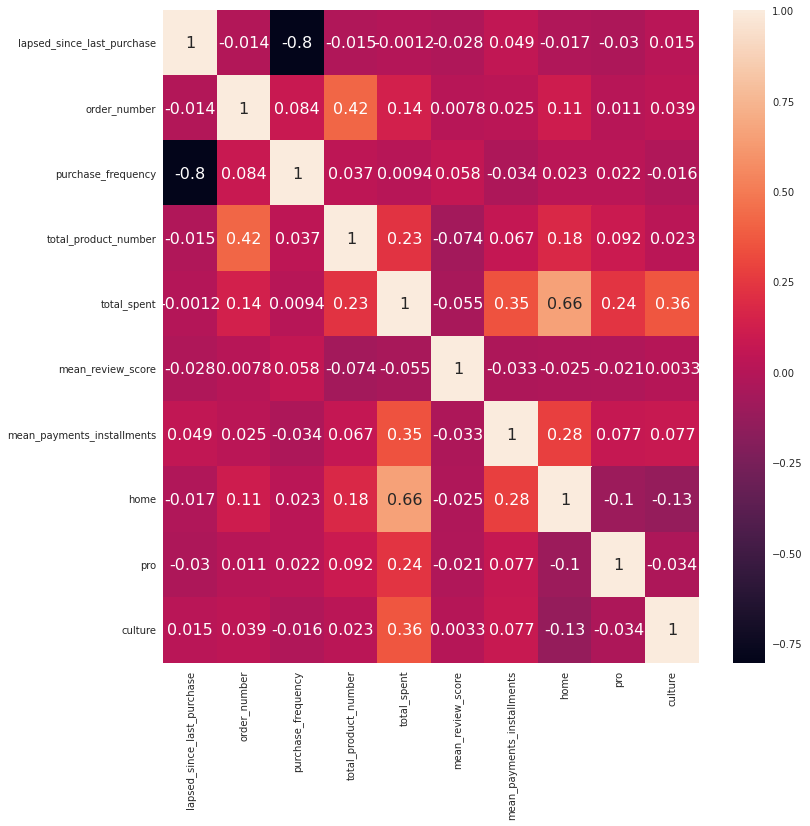

In [ ]:
#Matrice des corrélations
dataCorr = data.corr(method='pearson')
plt.figure(figsize=(12, 12))
sns.heatmap(dataCorr, annot=True)
plt.show()
# Sauvegarde des graphiques
#plt.savefig('Corr1.png')

Plusieurs de ces corrélations sont logiques : le montant total dépensé avec les montants dépensés dans chacune des catégories et les paiements en plusieurs fois (plus le paiement est élevé plus il faut de mensualités).
Le nombre de produits achetés est corrélé avec le nombre de commandes.

Les clients "home" on plus dépensé, est-ce pour cela qu'on remarque que les paiements en plusieurs fois on plutôt lieu avec des clients du groupe de produit "home" ?

Enfin la fréquence est plus élevée lorsque le premier achat est récent, c'est naturel vu notre méthode de calcul de la fréquence. Je ne suis pas parfaitement convaincu par cette méthode de calcul de la fréquence, mais je ne suis pas plus convaincu par les alternatives. (ie ne pas calculer de fréquence sur les clients n'ayant qu'un achat pour remplacer par la moyenne entrainerait un immense cluster autour de cette unique valeur)

Au vu de la matrice de corrélation, je ne vois pas de variable inutile à retirer.

# Analyse par composante principale

In [16]:
# Fonctions récupérées sur Git arrangées par mes soins

from matplotlib.collections import LineCollection


def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
  #Fonction d'affichage des composantes dans leur cercle
    for d1, d2 in axis_ranks:
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(11,10))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b') # affichage d'un cercle de centre 0,0 et de rayon 1
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--') #Affichage de segments grâce aux coordonnées
            plt.plot([0, 0], [-1, 1], color='grey', ls='--') #Affichage de segments grâce aux coordonnées

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1))) #Numéro de composante :d1+1
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1))) #Numéro de composante :d2+1

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False) #Retourne les figures immédiatement
        
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, alpha=1):
  #Fonction d'affichage des points selon le plan factoriel
    for d1,d2 in axis_ranks:
        if d2 < n_comp:

            # initialisation de la figure       
            fig = plt.figure(figsize=(7,6))
        
            # affichage des points
            plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
                
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--') #Affichage de segments grâce aux coordonnées
            plt.plot([0, 0], [-100, 100], color='grey', ls='--') #Affichage de segments grâce aux coordonnées

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False) #Retourne les figures immédiatement

def display_scree_plot(pca):
  #Fonction d'affichage de l'éboulis des valeurs propres
    scree = pca.explained_variance_ratio_*100 #Résultats de ratios d'inertie
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o') #Affichage de la somme cumulée des ratios d'inertie
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False) #Retourne la figures immédiatement

In [17]:
# Vu le tri important déjà effectué par le feature engineering, l'ACP est ici utilisée pour permettre d'aider à la visualisation des clusters dans des espaces à 2 dimensions interprétables
# Paramètres de l'ACP
acpComponent = 6
# Remplissage des valeurs manquantes par la moyenne (Review Score)
data = data.fillna(data.mean())
# Conversion en type array en séparant les noms des variables et l'index des produits
X = data.values
# Centrage et réduction des données
X = preprocessing.StandardScaler().fit_transform(X)
# Initialisation d'un objet de type PCA
acp = decomposition.PCA(n_components=acpComponent)
acp.fit(X)


PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

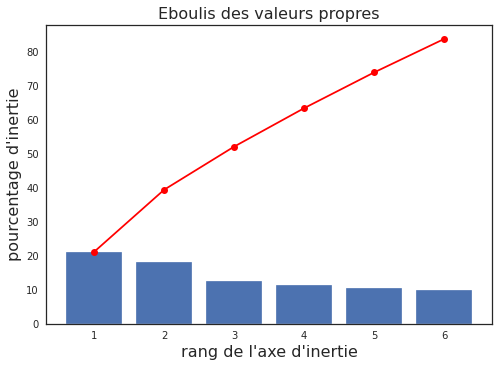

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 576x396 with 0 Axes>

In [ ]:
#Eboulis des valeurs propres
display_scree_plot(acp)
# Sauvegarde des graphiques
plt.savefig('eboulis.png')
files.download('eboulis.png')

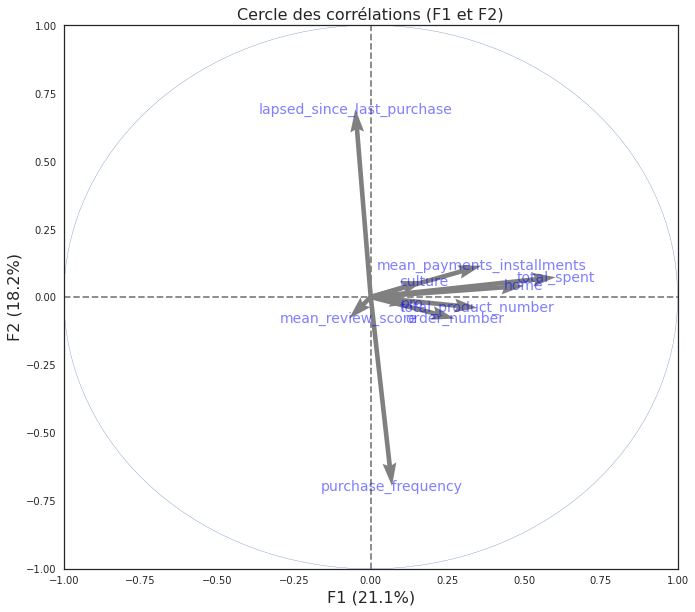

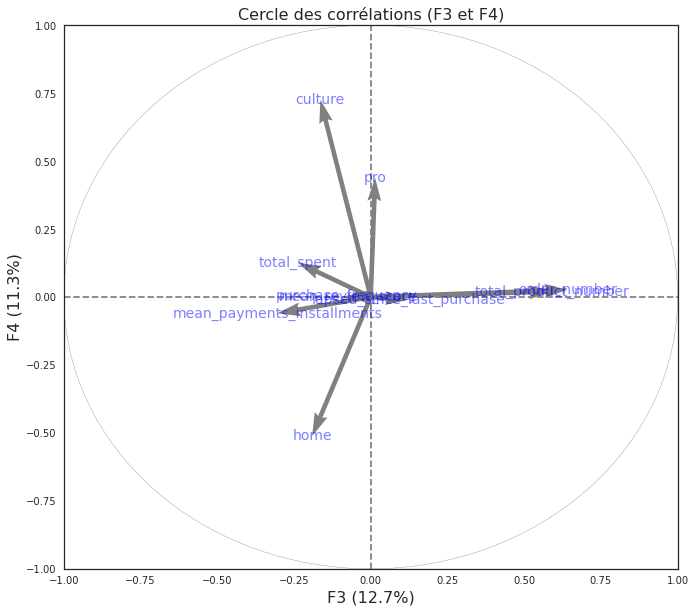

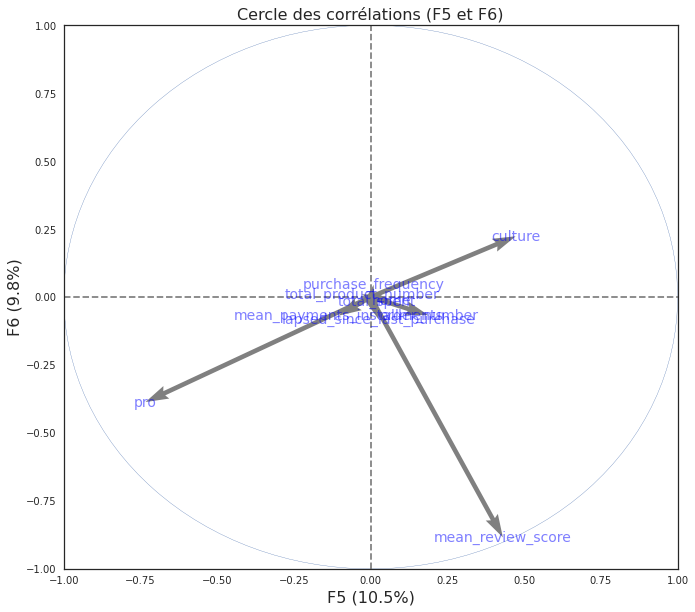

In [ ]:
# Cercle des corrélations
display_circles(acp.components_, acpComponent, acp, [(0,1),(2,3),(4,5)], labels = np.array(data.columns))


CP1 : nombre de commandes, de produits, montant total, mensualités (volume d'achat)

CP2 : anti corrêlé à la récence et fréquence des achats

CP3: nombre de produits/commandes

CP4: Intéressement pour les achats culture et pro et pas par les achats home

CP5 : Achats culture plutôt que pro

CP6 : Review élevée et plutôt achats pro

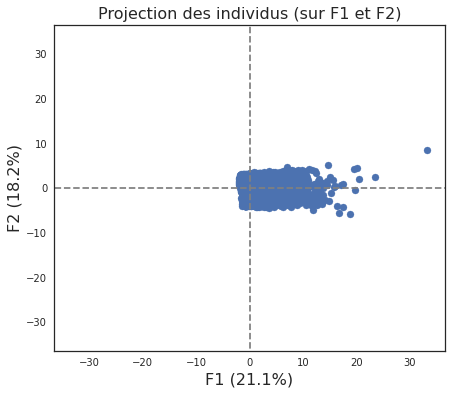

In [ ]:
# Projection des individus sur les composantes 1 et 2
XProjection = acp.transform(X)
display_factorial_planes(XProjection, acpComponent, acp, [(0,1)])

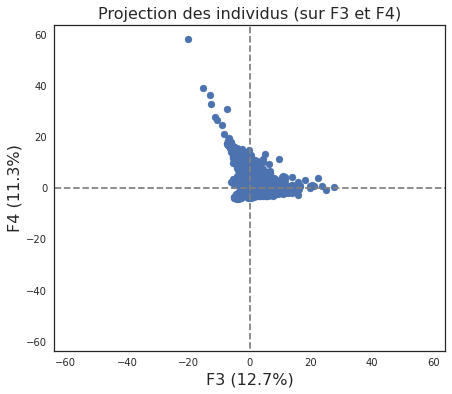

In [ ]:
# Projection des individus sur les composantes 3 et 4
XProjection = acp.transform(X)
display_factorial_planes(XProjection, acpComponent, acp, [(2,3)])

# Classification K-means

## Recherche de K

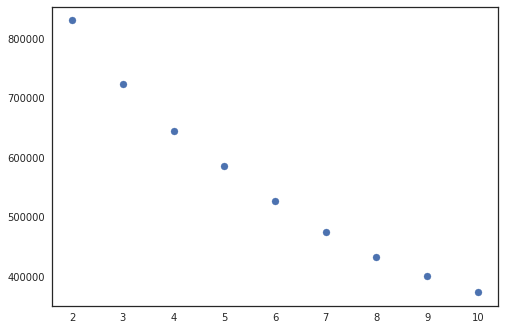

In [ ]:
# Relève de l'inertie intraclasse pour différents nombres de clusters
# Initialisation
nbClusters = 0
inertia=list()
nbList=list()

# Boucle pour 2 à 10 clusters
for i in range(1,10):
  nbClusters = 1+i
  # Classification test
  kM = KMeans(n_clusters=nbClusters)
  kM.fit(X)
  # Enregistrement des résultats
  inertia.append(kM.inertia_)
  nbList.append(nbClusters)
# Graphique
plt.scatter(nbList,inertia)

Il n'y a pas de coude précis qui apparaisse, il nous faut une analyse plus étendue.

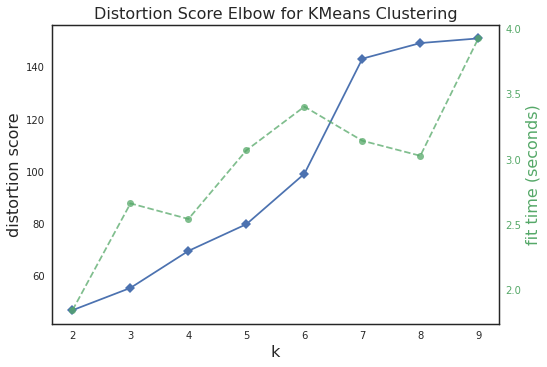

In [ ]:
# Visualisation avec la bibliothèque YellowBricks
# La documentation décrit : distorsion: sum of squared distances from each point to its assigned center = inertie intra classe
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(X)
visualizer.poof()

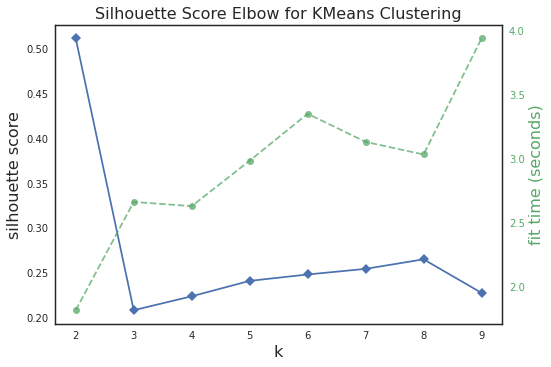

In [ ]:
# Visualisation de avec la bibliothèque YellowBricks
# Silhouette
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette', timing=False)

visualizer.fit(X)
visualizer.poof()

D'après les mesures de distorsion et de silhouette, on peut fixer un nombre de clusters à 4. Le jeu de données ne présente pas naturellement des clusters très marqués, le choix du nombre de clusters est donc relativement arbitraire.

## Représentations graphiques

In [ ]:
# Nombre de clusters
nbClusters = 4

# Classification
kM = KMeans(n_clusters=nbClusters, random_state=42)
kM.fit(X)

clusters = kM.labels_
centroids = kM.cluster_centers_


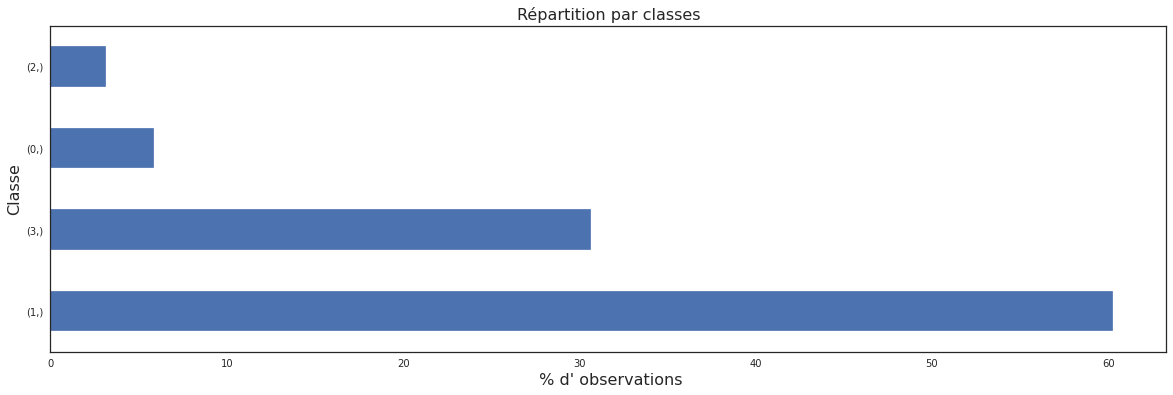

In [ ]:
# Visualisation de la répartition des observations au sein des classes
# Comptage des observations par classes
clustersRep = pd.DataFrame(clusters, columns=['Classe'])
clustersRep = clustersRep.value_counts()/data.shape[0]*100

# Représentation graphique
plt.figure(figsize=(20,6))
figDescription = clustersRep.plot.barh()
figDescription.set(xlabel=' % d\' observations')
figDescription.set(title='Répartition par classes')
plt.show()

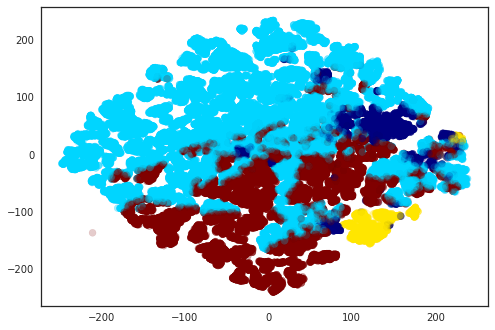

In [ ]:
# Affichage des clusters avec t-SNE
tsne = manifold.TSNE(n_components=2, perplexity=30, n_iter=5000, init='pca')
X_tsne = tsne.fit_transform(X)
plt.scatter(X_tsne[:,0],X_tsne[:,1],c=clusters.astype(np.float), cmap = 'jet', alpha=.2)

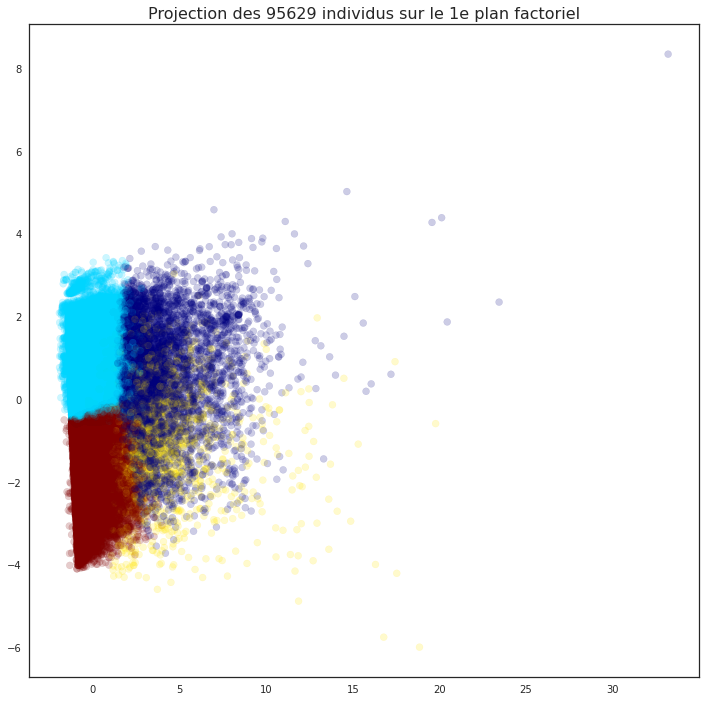

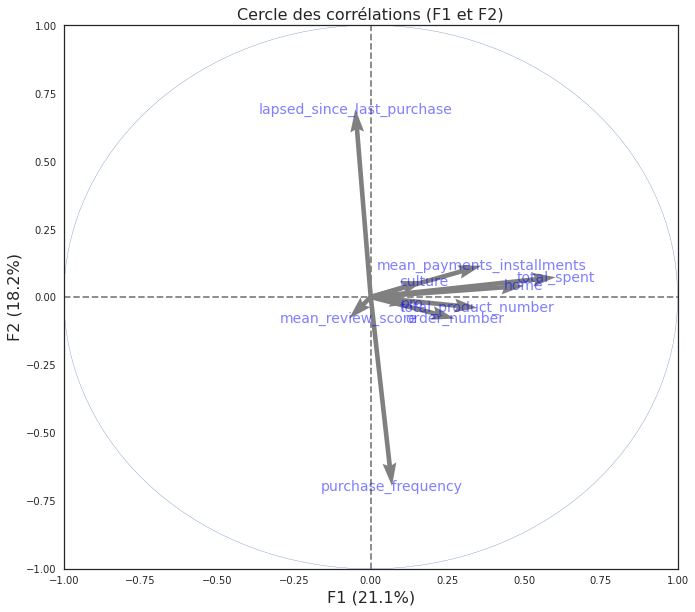

In [ ]:
#Affichage de la répartition sur les plans factoriels
pca = decomposition.PCA(n_components=6).fit(X)
XProjection = pca.transform(X)

# Affichage du graphique sur le premier plan factoriel
plt.figure(figsize=(12, 12))
plt.scatter(XProjection[:, 0], XProjection[:, 1], c=clusters.astype(np.float), cmap = 'jet', alpha=.2)
plt.title("Projection des {} individus sur le 1e plan factoriel".format(XProjection.shape[0]))
plt.show(block=False)
# Affichage des composantes correspondantes
display_circles(acp.components_, acpComponent, acp, [(0,1)], labels = np.array(data.columns))

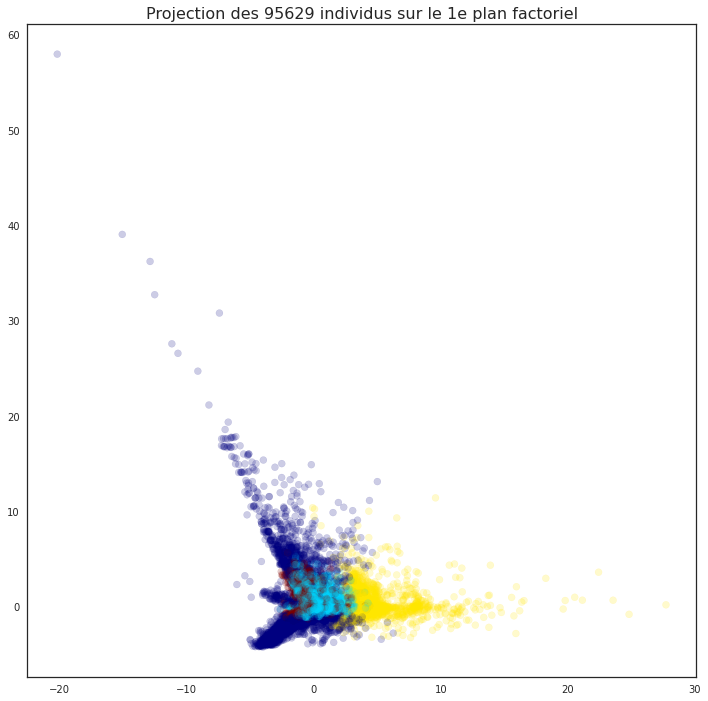

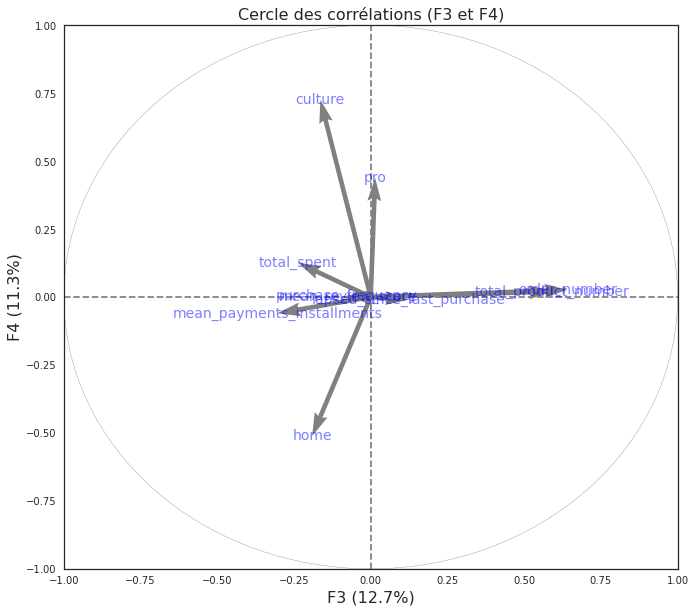

In [ ]:
# Affichage du graphique sur le deuxième plan factoriel
plt.figure(figsize=(12, 12))
plt.scatter(XProjection[:, 2], XProjection[:, 3], c=clusters.astype(np.float), cmap = 'jet', alpha=.2)
plt.title("Projection des {} individus sur le 2e plan factoriel".format(XProjection.shape[0]))
plt.show(block=False)
# Affichage des composantes correspondantes
display_circles(acp.components_, acpComponent, acp, [(2,3)], labels = np.array(data.columns))

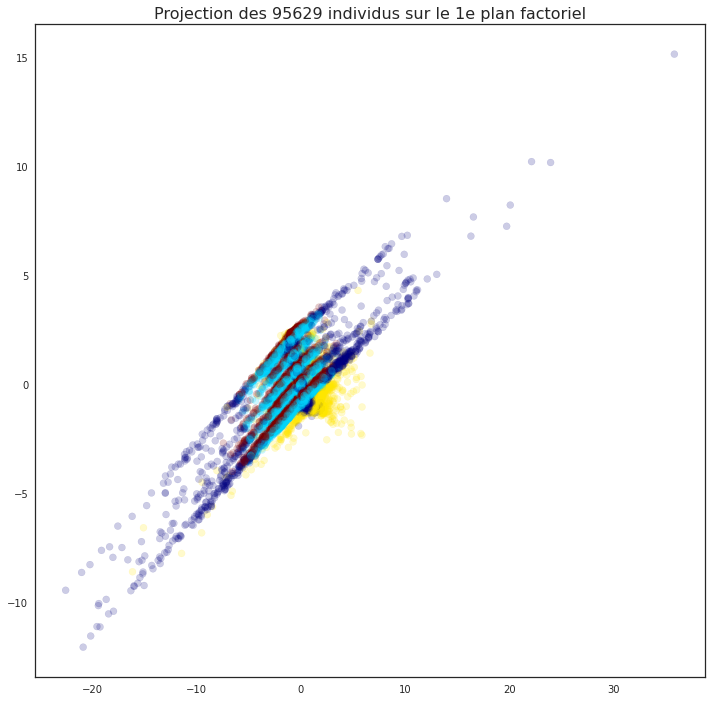

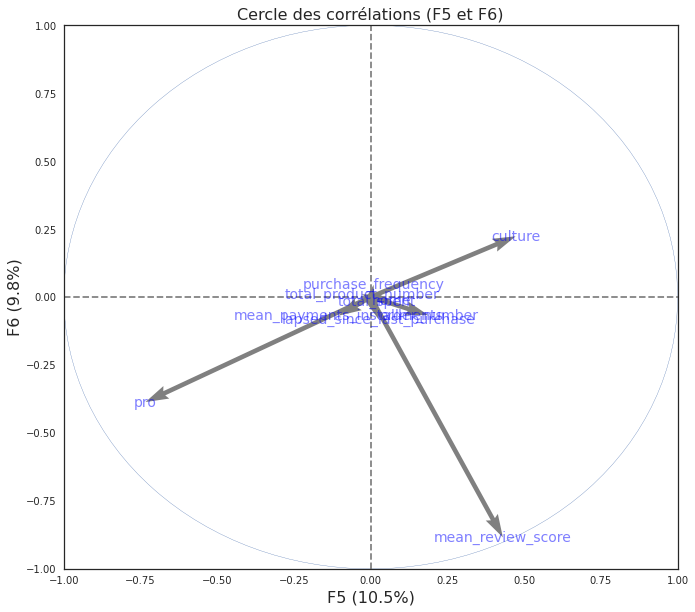

In [ ]:
# Affichage du graphique sur le troisième plan factoriel
plt.figure(figsize=(12, 12))
plt.scatter(XProjection[:, 4], XProjection[:, 5], c=clusters.astype(np.float), cmap = 'jet', alpha=.2)
plt.title("Projection des {} individus sur le 3e plan factoriel".format(XProjection.shape[0]))
plt.show(block=False)
# Affichage des composantes correspondantes
display_circles(acp.components_, acpComponent, acp, [(4,5)], labels = np.array(data.columns))

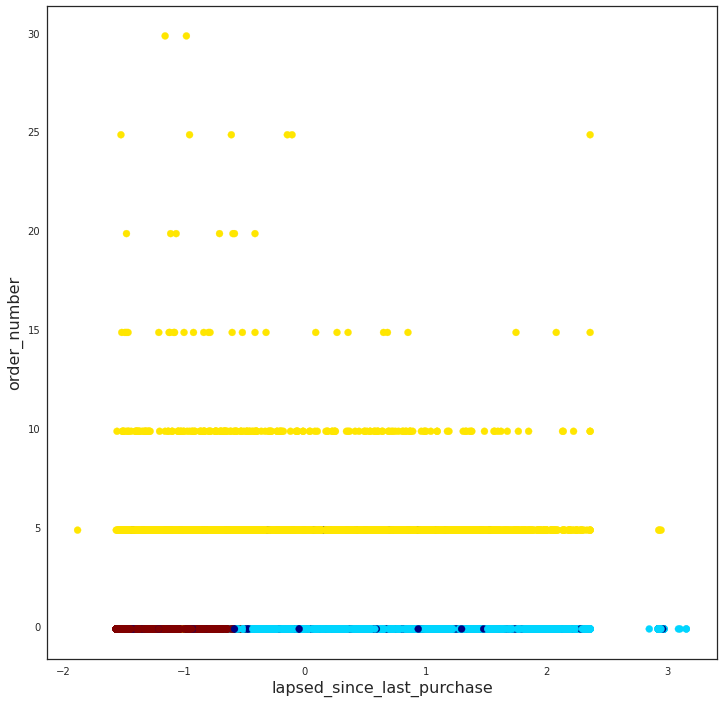

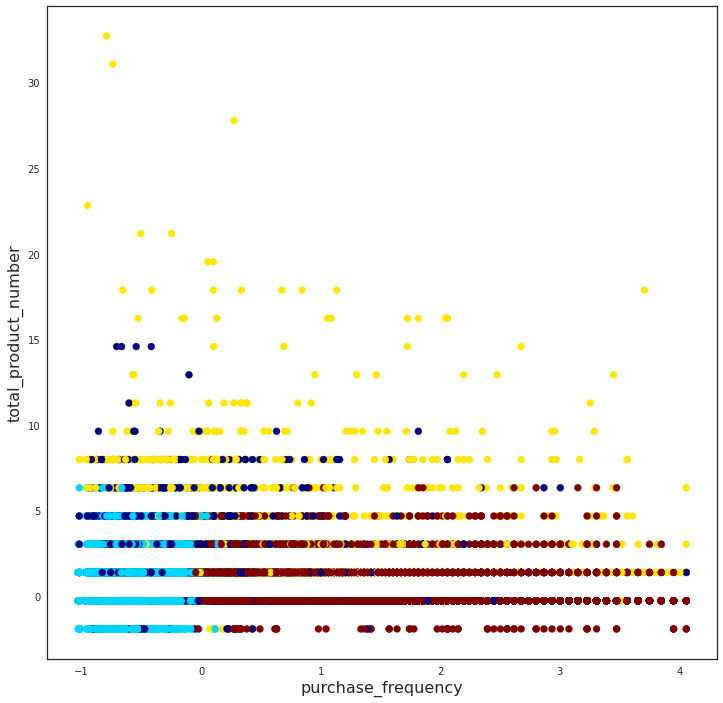

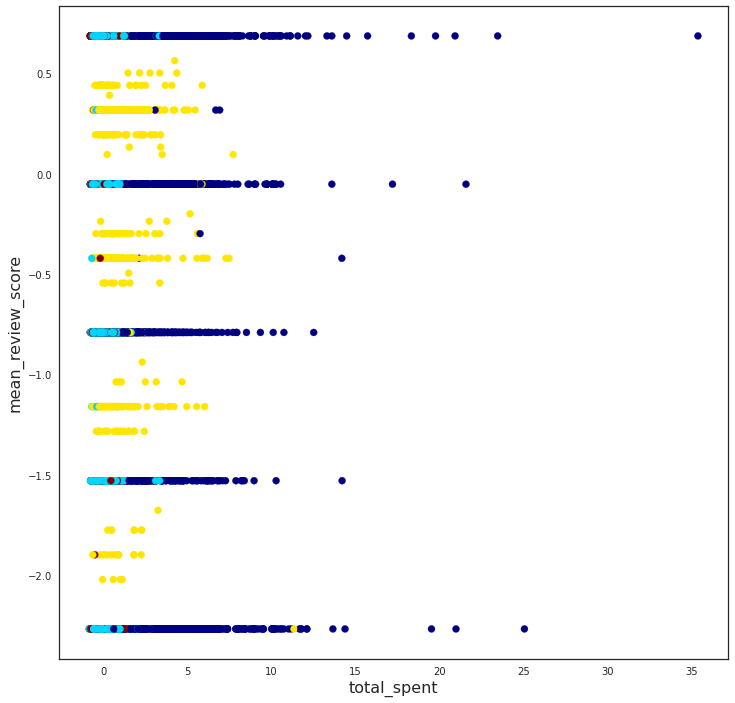

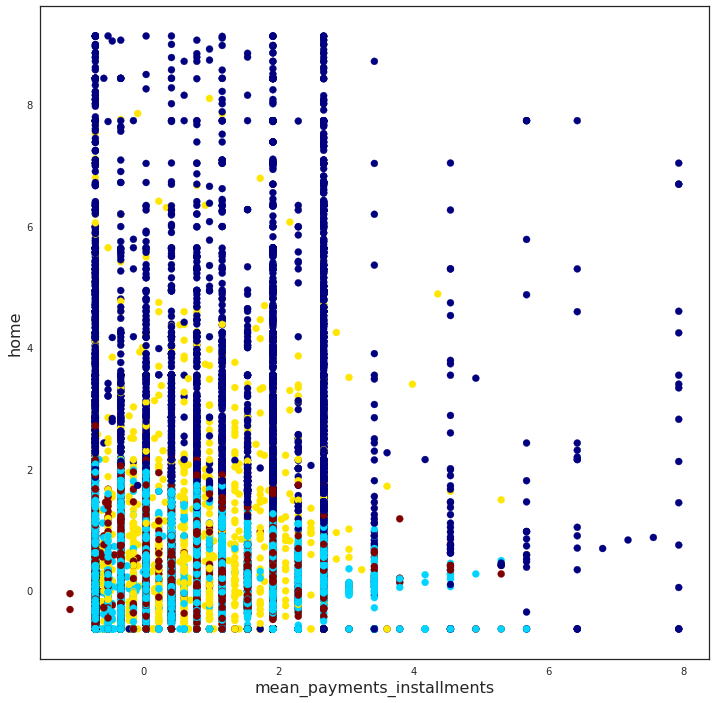

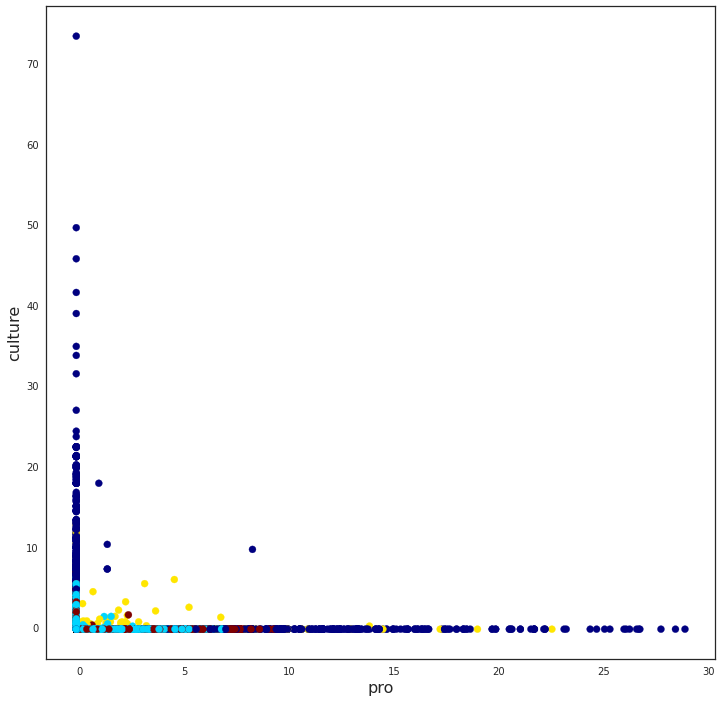

In [ ]:
#Affichage des graphiques selon les variables du df de travail
plt.figure(figsize=(12, 12))
plt.scatter(X[:,0],X[:,1], c=kM.labels_, cmap='jet')
plt.xlabel(data.columns[0])
plt.ylabel(data.columns[1])
plt.figure(figsize=(12, 12))
plt.scatter(X[:,2],X[:,3], c=kM.labels_, cmap='jet')
plt.xlabel(data.columns[2])
plt.ylabel(data.columns[3])
plt.figure(figsize=(12, 12))
plt.scatter(X[:,4],X[:,5], c=kM.labels_, cmap='jet')
plt.xlabel(data.columns[4])
plt.ylabel(data.columns[5])
plt.figure(figsize=(12, 12))
plt.scatter(X[:,6],X[:,7], c=kM.labels_, cmap='jet')
plt.xlabel(data.columns[6])
plt.ylabel(data.columns[7])
plt.figure(figsize=(12, 12))
plt.scatter(X[:,8],X[:,9], c=kM.labels_, cmap='jet')
plt.xlabel(data.columns[8])
plt.ylabel(data.columns[9])
plt.show()


## Analyse des classes

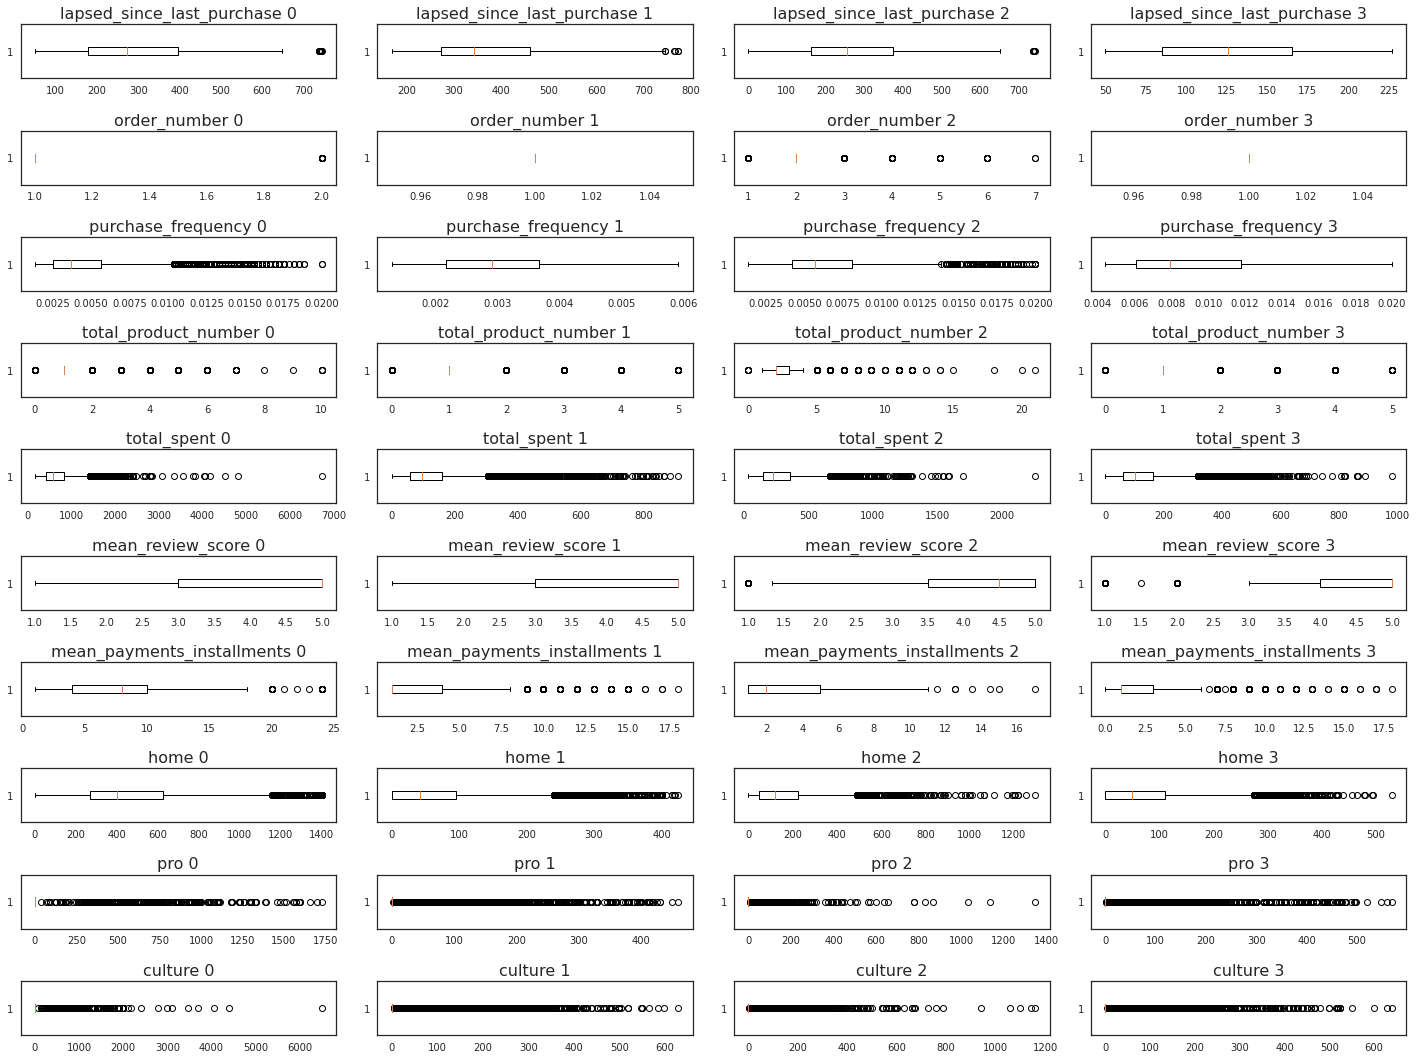

In [ ]:
# Graphiques boxplot de certains indicateurs
sns.set({"font.size":16,"axes.titlesize":16,"axes.labelsize":16}, style='white')

# Variables à afficher
featuresToBoxplot = data.columns.tolist()
# Ajout de la colonne cluster au df pour query()
data['cluster']=clusters

# Initialisation de la position du graphique
j=0
rows=len(featuresToBoxplot)
cols = nbClusters

# Initialisation du graphique
fig, axes = plt.subplots(rows, cols, figsize=(20,15))

# Boucle permettant de créer un graphique par indicateur et par cluster
for cls in range(nbClusters) :
  i=0
  # Données du cluster
  # Création de la condition pour .query()
  strToTest = str(f'cluster == \'{cls}\'')
  # Echantillon d'une catégorie
  dataSub = data.query(strToTest)
  for feature in featuresToBoxplot :
    # Emplacement itératif du graphique
    axes[i][j].boxplot(x=dataSub[feature], vert=False)
    axes[i][j].set_title(f'{feature} {cls}')
    # Incrémentation de la position
    i+=1
  # Incrémentation de la position
  j+=1
plt.tight_layout()
plt.show()
#Retrait de la colonne cluster du df
featuresML = featuresToBoxplot
data = data[featuresML]


Cluster 0 : (6%) Clients ayant effectué de gros achats, principalement dans la catégorie 'home', usage des échéances très fréquent

Cluster 1 : (60%) Clients anciens, petits achats

Cluster 2 : (3%) Clients ayant commandé plusieurs fois et/ou de nombreux produits pour un montant total élevé, utilisation modérée des mensualités

Cluster 3 : (31%) Nouveaux clients, petits achats, plutôt très satisfaits du service avec logiquement peu d'usage des délais de paiement

On obtient assez peu d'information de la part des catégories Pro et Culture ainsi que de la fréquence (qui n'a réellement de sens que pour très peu de clients de toute façon), on pourrait éventuellement les retirer de l'algorithme.

## Stabilité, performance et conclusion

In [ ]:
# Silhouette
print("Coefficient de silhouette: %0.3f"
      % metrics.silhouette_score(X, kM.labels_))

Coefficient de silhouette: 0.224


Text(0.5, 1.0, 'ARI')

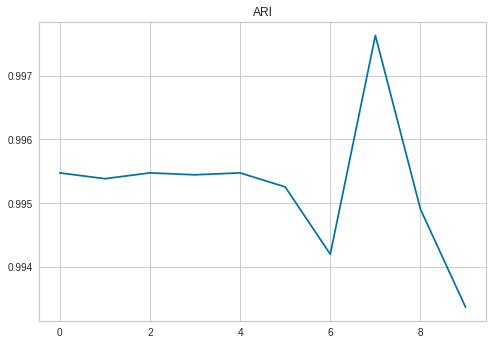

In [ ]:
# Stabilité par le calcul de l'ARI
# Initialisation
nbClusters = 4
stability = list()

# Test de sabilité sur 10 itérations
for i in range(0,10):
  # Classification
  kMS = KMeans(n_clusters=nbClusters)
  kMS.fit(X)

  clustersS = kMS.labels_
  stability.append(metrics.adjusted_rand_score(clusters,clustersS))

# Graphique
plt.plot(stability)
plt.title('ARI')




L'ARI minimal est proche de 0.993 ce qui est très proche de 1, la méthode est donc très stable.

Conclusion sur la classification k-Means :
Le jeu de donnée présente des observations très agglomérées qu'il est difficile de classifier clairement. Cependant, la méthode du K-means à tout de même permis de classer les clients en 4 catégories contenant chacune une quantité non négligeable de données et dont une grande partie des caractéristiques est interprétable concrêtement.


# Classification DBSCAN

In [10]:
# Test de différents paramètres d'eps
silhouetteList = list()
for epsTest in [0.9,1,1.1,1.2,1.3]:
# Classification DBSCAN
  db = DBSCAN(eps=epsTest, min_samples=10).fit(X)
  coreSamplesMask = np.zeros_like(db.labels_, dtype=bool)
  coreSamplesMask[db.core_sample_indices_] = True
  clusters = db.labels_

# Nombre de clusters
  nbClusters = len(set(clusters)) - (1 if -1 in clusters else 0)
  nbNoise = list(clusters).count(-1)
  silhouetteList.append(metrics.silhouette_score(X, db.labels_))
  print('Nombre de clusters: %d' % nbClusters)
  print('Nombre de points non classés: %d' % nbNoise)
  print("Coefficient de silhouette: %0.3f" % metrics.silhouette_score(X, db.labels_))

Nombre de clusters: 21
Nombre de points non classés: 4877
Coefficient de silhouette: 0.058
Nombre de clusters: 13
Nombre de points non classés: 4037
Coefficient de silhouette: 0.093
Nombre de clusters: 13
Nombre de points non classés: 3426
Coefficient de silhouette: 0.094
Nombre de clusters: 14
Nombre de points non classés: 2907
Coefficient de silhouette: 0.115
Nombre de clusters: 17
Nombre de points non classés: 2458
Coefficient de silhouette: 0.118


In [ ]:
# Classification DBSCAN
db = DBSCAN(eps=1, min_samples=10).fit(X) #eps
coreSamplesMask = np.zeros_like(db.labels_, dtype=bool)
coreSamplesMask[db.core_sample_indices_] = True
clusters = db.labels_

# Nombre de clusters
nbClusters = len(set(clusters)) - (1 if -1 in clusters else 0)
nbNoise = list(clusters).count(-1)

print('Nombre de clusters: %d' % nbClusters)
print('Nombre de points non classés: %d' % nbNoise)
print("Coefficient de silhouette: %0.3f"
      % metrics.silhouette_score(X, db.labels_))

Nombre de clusters: 13
Nombre de points non classés: 4037
Coefficient de silhouette: 0.093


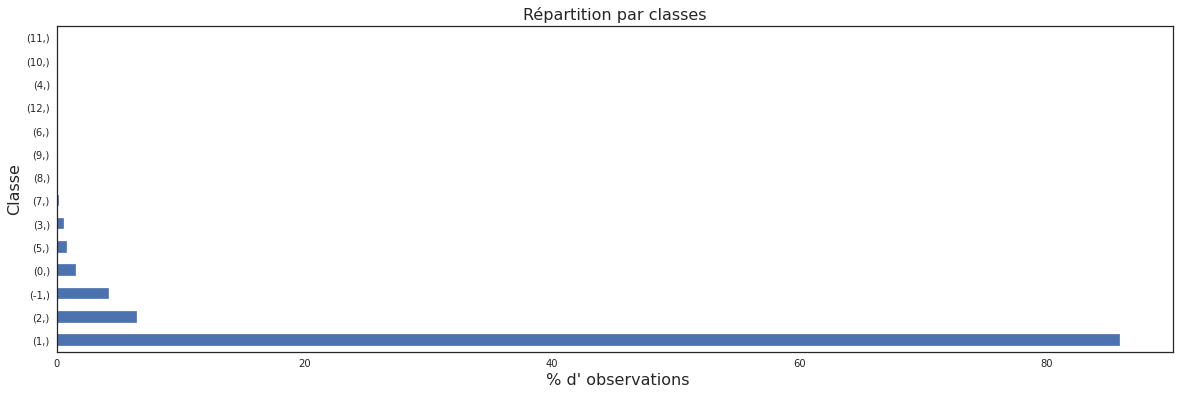

In [ ]:
# Visualisation de la répartition des observations au sein des classes
# Comptage des observations par classes
clustersRep = pd.DataFrame(clusters, columns=['Classe'])
clustersRep = clustersRep.value_counts()/data.shape[0]*100

# Représentation graphique (notons que la classe -1 correspond aux points non classés)
plt.figure(figsize=(20,6))
figDescription = clustersRep.plot.barh()
figDescription.set(xlabel=' % d\' observations')
figDescription.set(title='Répartition par classes')
plt.show()


## Représentations graphiques

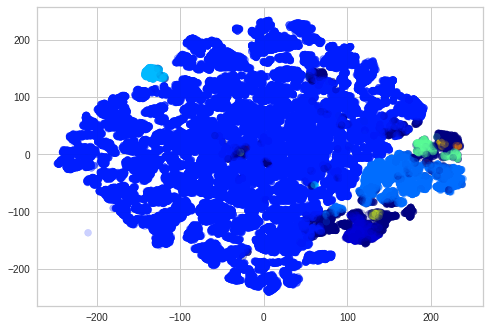

In [ ]:
# Affichage des clusters avec t-SNE
tsne = manifold.TSNE(n_components=2, perplexity=30, n_iter=5000, init='pca')
X_tsne = tsne.fit_transform(X)
plt.scatter(X_tsne[:,0],X_tsne[:,1],c=clusters.astype(np.float), cmap = 'jet', alpha=.2)

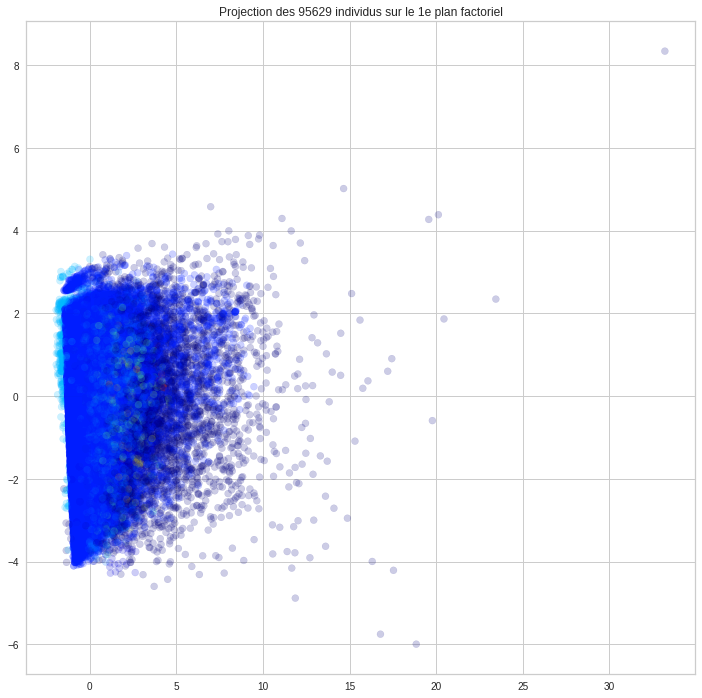

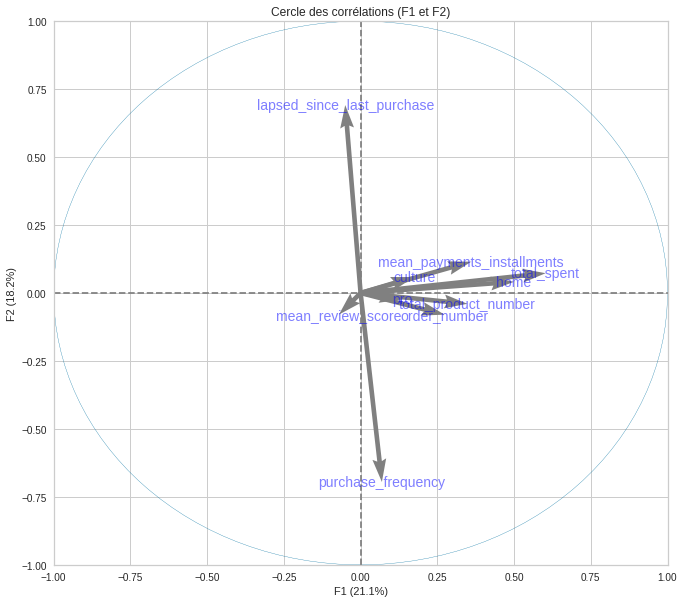

In [ ]:
pca = decomposition.PCA(n_components=6).fit(X)
XProjection = pca.transform(X)


# Affichage du graphique sur le premier plan factoriel
plt.figure(figsize=(12, 12))
plt.scatter(XProjection[:, 0], XProjection[:, 1], c=clusters.astype(np.float), cmap = 'jet', alpha=.2)
plt.title("Projection des {} individus sur le 1e plan factoriel".format(XProjection.shape[0]))
plt.show(block=False)
# Affichage des composantes correspondantes
display_circles(acp.components_, acpComponent, acp, [(0,1)], labels = np.array(data.columns))

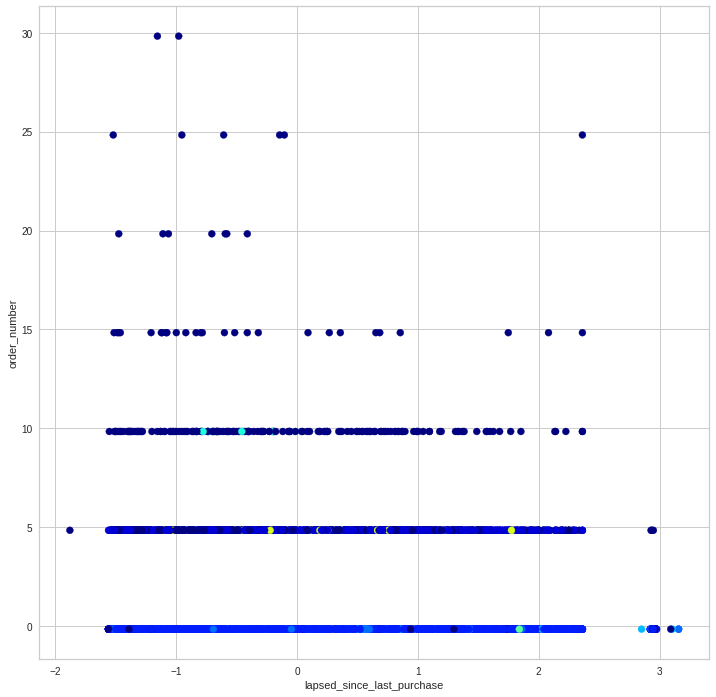

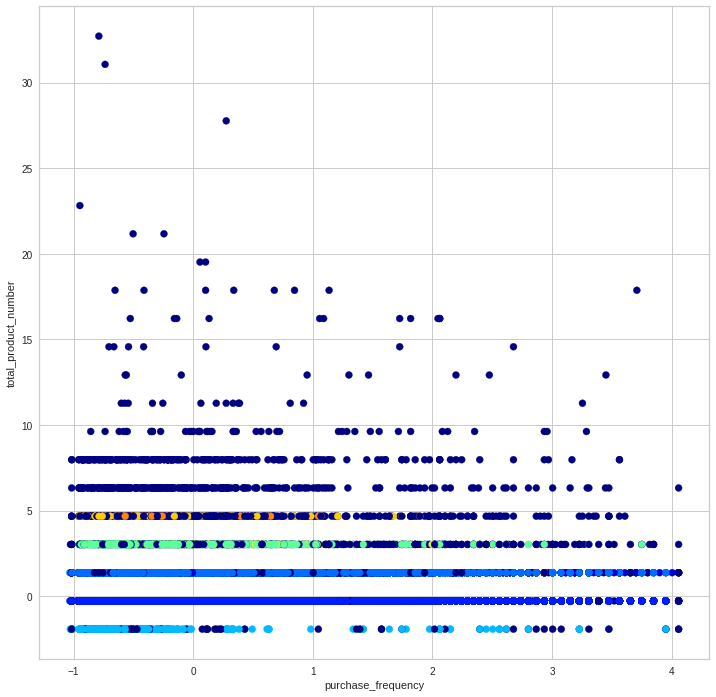

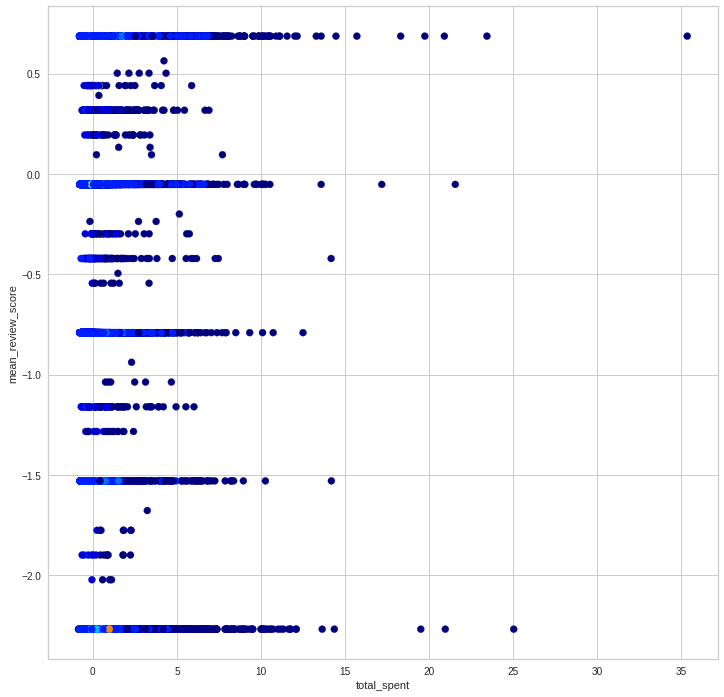

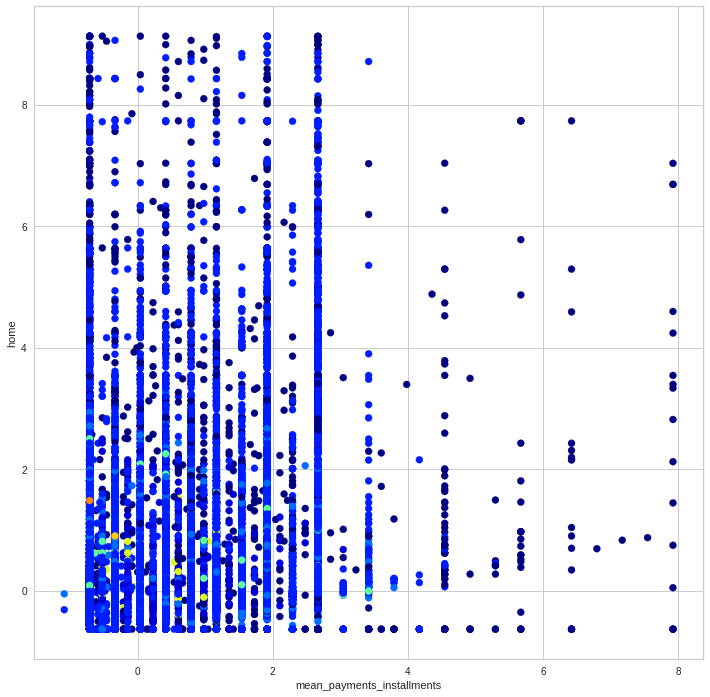

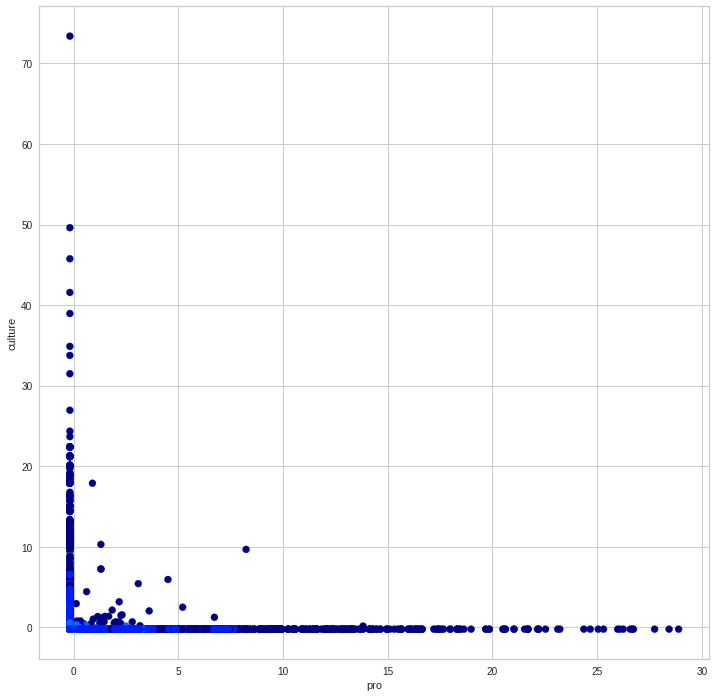

In [ ]:
#Affichage des graphiques selon les variables du df de travail
plt.figure(figsize=(12, 12))
plt.scatter(X[:,0],X[:,1], c=db.labels_, cmap='jet')
plt.xlabel(data.columns[0])
plt.ylabel(data.columns[1])
plt.show()
plt.figure(figsize=(12, 12))
plt.scatter(X[:,2],X[:,3], c=db.labels_, cmap='jet')
plt.xlabel(data.columns[2])
plt.ylabel(data.columns[3])
plt.show()
plt.figure(figsize=(12, 12))
plt.scatter(X[:,4],X[:,5], c=db.labels_, cmap='jet')
plt.xlabel(data.columns[4])
plt.ylabel(data.columns[5])
plt.show()
plt.figure(figsize=(12, 12))
plt.scatter(X[:,6],X[:,7], c=db.labels_, cmap='jet')
plt.xlabel(data.columns[6])
plt.ylabel(data.columns[7])
plt.show()
plt.figure(figsize=(12, 12))
plt.scatter(X[:,8],X[:,9], c=db.labels_, cmap='jet')
plt.xlabel(data.columns[8])
plt.ylabel(data.columns[9])
plt.show()

## Conclusion dbscan

L'algorithme ne permet pas de définir de clusters de façon pertinente, il y a en effet un cluster très largement majoritaire et les autres sont très petits, les rendant inutiles. La nature du jeu de données très aggloméré ne convient pas à un algorithme classifiant de proche en proche. Il y a également 4% de valeurs non classées. L'interprétation des clusters ne donne rien de plus, seul le cluster 2 est interprétable (gros clients).

# Clustering Hiérarchique

## Recherche du nombre de clusters

In [20]:
# Echantillonage car la RAM disponible insuffisante pour le clustering hiérarchique
dataSample = data.sample(n=20000, random_state=42)
# Remplissage des valeurs manquantes par la moyenne
dataSample = dataSample.fillna(dataSample.mean())
# Conversion en type array en séparant les noms des variables et l'index des produits
XSample = dataSample.values
# Centrage et réduction des données
XSample = preprocessing.StandardScaler().fit_transform(XSample)

# Clustering hiérarchique avec différents nombre de clusters de base calculés par distance euclidienne moyenne des points des clusters
silhouetteList = list()
for nbClusters in range(2,11):
  aggC = AgglomerativeClustering(n_clusters=nbClusters, affinity='euclidean', linkage='average')
  aggC.fit_predict(XSample)
  clusters = aggC.labels_
  print("Coefficient de silhouette: %0.3f"
      % metrics.silhouette_score(XSample, aggC.labels_))
  silhouetteList.append(metrics.silhouette_score(XSample, aggC.labels_))


Coefficient de silhouette: 0.882
Coefficient de silhouette: 0.852
Coefficient de silhouette: 0.828
Coefficient de silhouette: 0.801
Coefficient de silhouette: 0.800
Coefficient de silhouette: 0.775
Coefficient de silhouette: 0.716
Coefficient de silhouette: 0.716
Coefficient de silhouette: 0.714


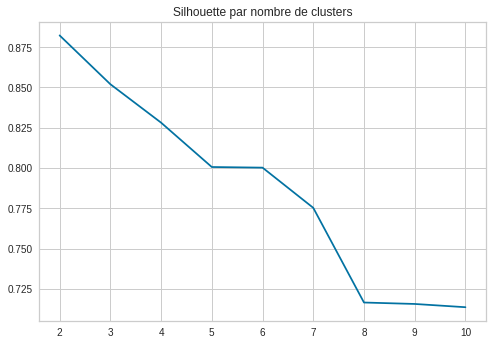

In [21]:
# Représentation graphique
y = [*range(2,11)]
x = silhouetteList
plt.plot(y, x)
plt.title('Silhouette par nombre de clusters')
plt.show()

La silhouette chute rapidement avec l'augmentation du nombre de clusters. Pour conserver un certain sens à la classification, on va tout de même conserver au moins 3 clusters.

In [22]:
# Clustering hiérarchique avec 3 clusters calculés par distance euclidienne moyenne des points des clusters
aggC = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
aggC.fit_predict(XSample)
clusters = aggC.labels_

# Coefficient de silhouette
print("Coefficient de silhouette: %0.3f"
      % metrics.silhouette_score(XSample, aggC.labels_))

Coefficient de silhouette: 0.852


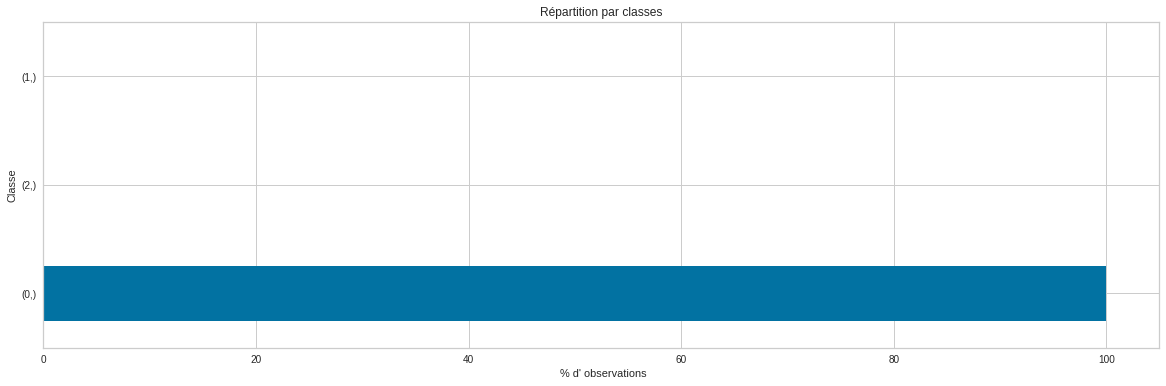

In [23]:
# Visualisation de la répartition des observations au sein des classes
# Comptage des observations par classes
clustersRep = pd.DataFrame(clusters, columns=['Classe'])
clustersRep = clustersRep.value_counts()/dataSample.shape[0]*100

# Représentation graphique
plt.figure(figsize=(20,6))
figDescription = clustersRep.plot.barh()
figDescription.set(xlabel=' % d\' observations')
figDescription.set(title='Répartition par classes')
plt.show()

# Représentations graphiques

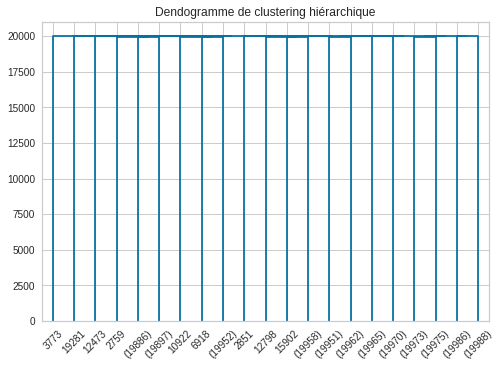

In [24]:
# Dendogramme

# Fonction récupérée sur GitHub et ré arrangée par mes soins
def plot_dendrogram(model, **kwargs):

    # 'Children'
    children = model.children_

    # Distance entre chaque paires de 'children'
    # En l'absence d'information, on utilise une distance uniforme
    distance = np.arange(children.shape[0])

    # Nombre d'observation contenues dans chaque niveau 
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Création de la matrice de liens
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Représentation graphique
    dendrogram(linkage_matrix, **kwargs)

plt.title('Dendogramme de clustering hiérarchique')
# Le Dendogramme a été tronqué, on a pris les 6 plus hauts niveaux
plot_dendrogram(aggC, p=6, truncate_mode='level')
plt.show()

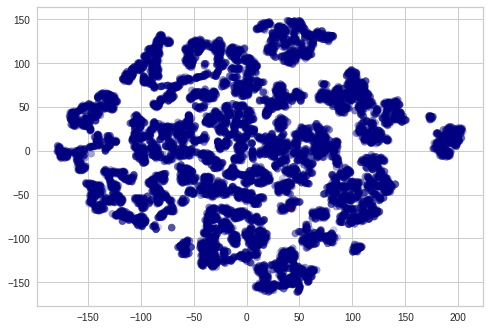

In [25]:
# Affichage des clusters avec t-SNE
tsne = manifold.TSNE(n_components=2, perplexity=30, n_iter=5000, init='pca')
X_tsne = tsne.fit_transform(XSample)
plt.scatter(X_tsne[:,0],X_tsne[:,1],c=clusters.astype(np.float), cmap = 'jet', alpha=.2)

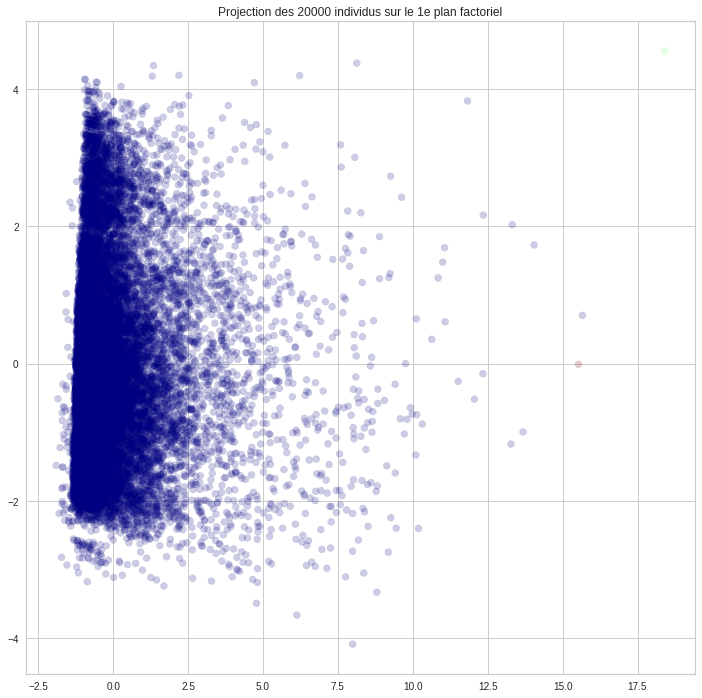

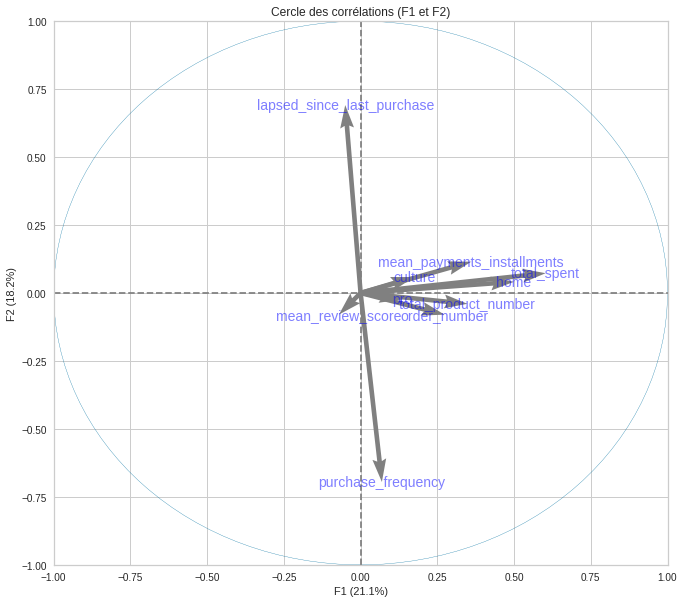

In [26]:
pca = decomposition.PCA(n_components=6).fit(XSample)
XProjection = pca.transform(XSample)

# Affichage du graphique sur le premier plan factoriel
plt.figure(figsize=(12, 12))
plt.scatter(XProjection[:, 0], XProjection[:, 1], c=clusters.astype(np.float), cmap = 'jet', alpha=.2)
plt.title("Projection des {} individus sur le 1e plan factoriel".format(XProjection.shape[0]))
plt.show(block=False)
# Affichage des composantes correspondantes
display_circles(acp.components_, acpComponent, acp, [(0,1)], labels = np.array(data.columns))

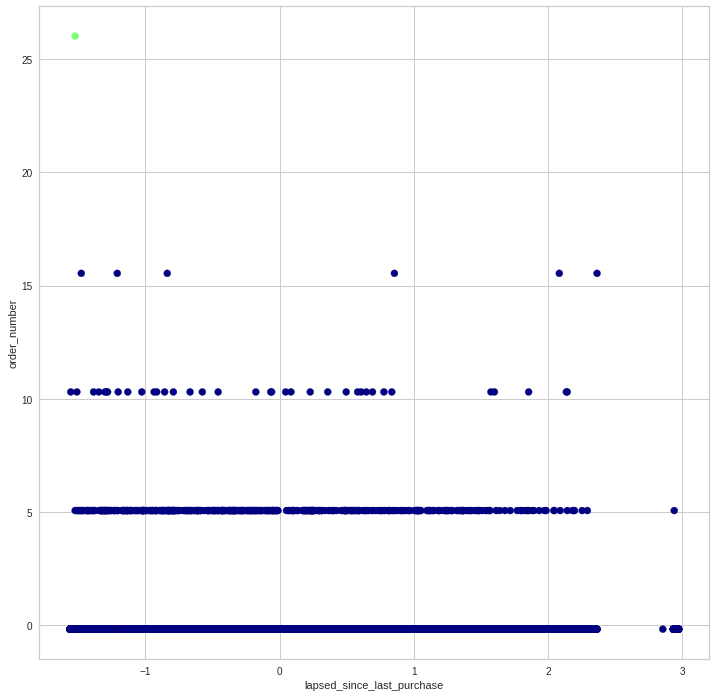

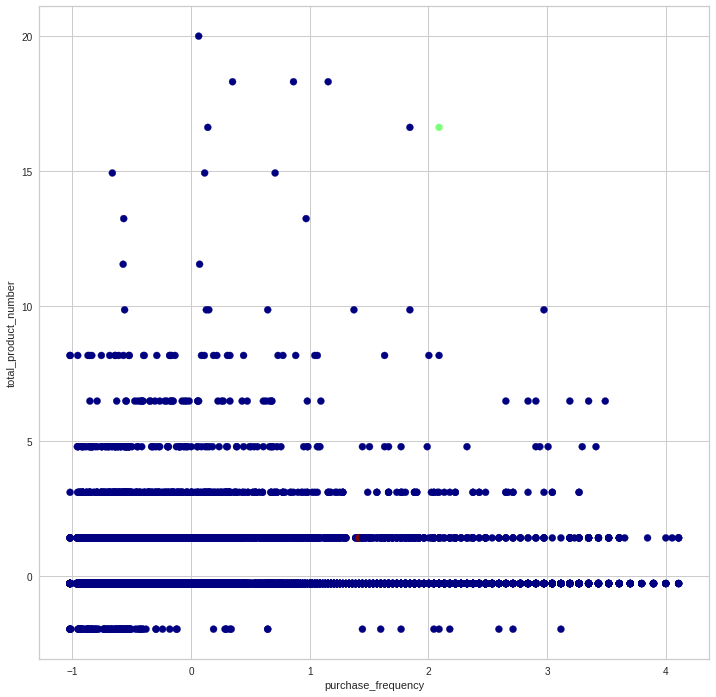

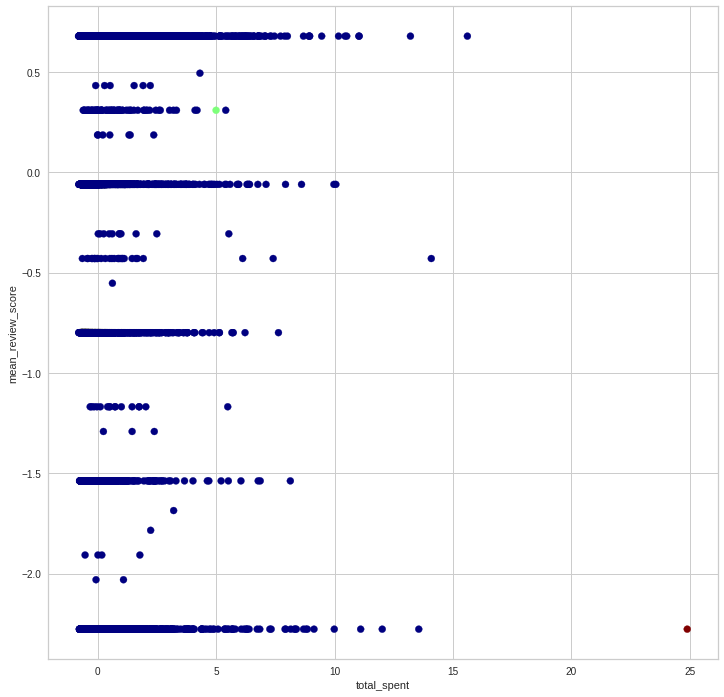

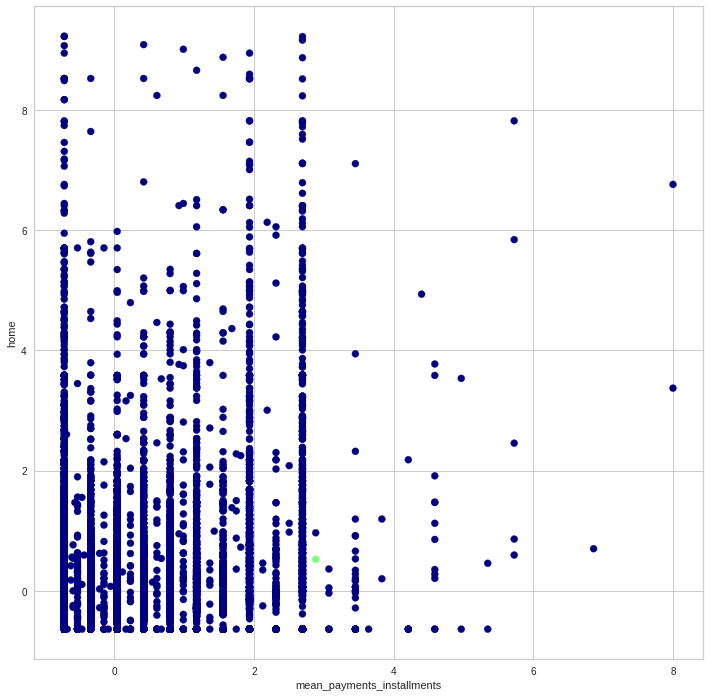

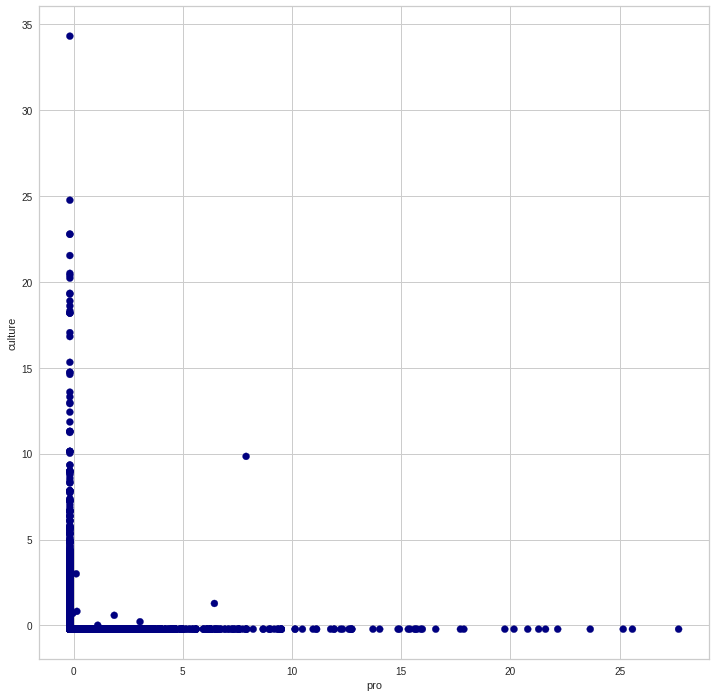

In [27]:
#Affichage des graphiques selon les variables du df de travail
plt.figure(figsize=(12, 12))
plt.scatter(XSample[:,0],XSample[:,1], c=aggC.labels_, cmap='jet')
plt.xlabel(data.columns[0])
plt.ylabel(data.columns[1])
plt.show()
plt.figure(figsize=(12, 12))
plt.scatter(XSample[:,2],XSample[:,3], c=aggC.labels_, cmap='jet')
plt.xlabel(data.columns[2])
plt.ylabel(data.columns[3])
plt.show()
plt.figure(figsize=(12, 12))
plt.scatter(XSample[:,4],XSample[:,5], c=aggC.labels_, cmap='jet')
plt.xlabel(data.columns[4])
plt.ylabel(data.columns[5])
plt.show()
plt.figure(figsize=(12, 12))
plt.scatter(XSample[:,6],XSample[:,7], c=aggC.labels_, cmap='jet')
plt.xlabel(data.columns[6])
plt.ylabel(data.columns[7])
plt.show()
plt.figure(figsize=(12, 12))
plt.scatter(XSample[:,8],XSample[:,9], c=aggC.labels_, cmap='jet')
plt.xlabel(data.columns[8])
plt.ylabel(data.columns[9])
plt.show()

## Conclusion Classification Hiérarchique

L'algorithme ne permet pas de définir de clusters de façon pertinente, les observations sont concentrées en grande majorité sur un seul cluster et le faible nombre d'observation dans les autres clusters les rendent inutiles. Le dendogramme montre notamment le peu de distance entre les classes. Les clusters sont cependant interprétable pour une bonne partie d'entre eux.

# Maintenance

Si l'ajout d'un nouveau client à la base de donnée ne nécessite que de lui attribuer une classe en calculant sa distance avec les centroïdes, on peut se demander à partir de combien de nouveaux clients il faudra effectuer une nouvelle classification. Il faut également étudier l'impact des saisons sur la classifications, les achats seront forcément différents à l'approche des fêtes par exemple.

Pour cela, on va séparer le data set en différents trimestres et étudier l'évolution de l'ARI entre le premier trimestre et le dataset augmenté des suivatns.

In [28]:
# Réintégration de la date de premier achat
data['first_purchase_date'] = data['order_number'] / data['purchase_frequency']
# Il est important de noter que le data set du mois 1 ne contient que les clients ayant fait leur premier achat au mois 1 mais tient compte des commandes effectuées par ces clients les mois suivants, le même principe s'applique à tous les mois suivants
#Pour éviter ce problème, il faudrait classifier par commande et non par client. Dans notre cas, vu le faible nombre de clients multi-commandes, l'effet reste réduit
# Dates des fins de mois
setStartDate = data['first_purchase_date'].max()
monDates = list()
for mon in range(0,26):
  monDates.append(setStartDate-(mon*30))
# Classement des observation par date pour faciliter la lecture
data.sort_values(by=['first_purchase_date'], inplace=True, ascending=False)

In [29]:
# Pour avoir un minimum d'observations sur notre premier set, la base de comparaison se fera sur 8 mois (8k observations)
setTr = 8
maintenanceStart = setTr
# Création de la condition pour .query()
strToTest = str(f'first_purchase_date < {monDates[0]} and first_purchase_date > {monDates[setTr]}')
# Echantillonnage sur la période concernée
dataT1 = data.query(strToTest)

# Remplissage des valeurs manquantes par la moyenne
dataT1 = dataT1.fillna(dataT1.mean())
# Conversion en type array en séparant les noms des variables et l'index des produits
X1 = dataT1[['lapsed_since_last_purchase', 'order_number', 'purchase_frequency',
       'total_product_number', 'total_spent', 'mean_review_score',
       'mean_payments_installments', 'home', 'pro', 'culture']].values
# Centrage et réduction des données
X1 = preprocessing.StandardScaler().fit_transform(X1)

# Nombre de clusters
nbClusters = 4

# Classification
kM1 = KMeans(n_clusters=nbClusters, random_state=42)
kM1.fit(X1)

clusters1 = kM1.labels_
centroids1 = kM1.cluster_centers_

In [30]:
# Initialisation de la liste des ARI obtenus
ARI = list()
Obs = list()

for mon in range(maintenanceStart+1,len(monDates)):
  # Création de la condition pour .query()
  strToTest = str(f'first_purchase_date < {monDates[0]} and first_purchase_date > {monDates[mon]}')
  # Echantillonnage sur la période concernée
  dataT = data.query(strToTest)
  # Remplissage des valeurs manquantes par la moyenn
  dataT = dataT.fillna(dataT.mean())
  # Conversion en type array en séparant les noms des variables et l'index des produits
  XT = dataT[['lapsed_since_last_purchase', 'order_number', 'purchase_frequency',
       'total_product_number', 'total_spent', 'mean_review_score',
       'mean_payments_installments', 'home', 'pro', 'culture']].values
  # Centrage et réduction des données
  XT = preprocessing.StandardScaler().fit_transform(XT)

  # Nombre de clusters
  nbClusters = 4

  # Classification
  kMT = KMeans(n_clusters=nbClusters, random_state=42)
  kMT.fit(XT)

  clustersT = kMT.labels_
  centroidsT = kMT.cluster_centers_

  # Calcul du nombre de nouvelles observations
  Obs.append(dataT.shape[0]-dataT1.shape[0])
  # Calcul de l'ARI
  ARI.append(metrics.adjusted_rand_score(clusters1,clustersT[0:dataT1.shape[0]]))
  print(f'Avec {Obs[setTr-9]} nouvelles observations, on obtient un ARI de {ARI[setTr-9]}')



Avec 3481 nouvelles observations, on obtient un ARI de 0.9944252854788018
Avec 6460 nouvelles observations, on obtient un ARI de 0.9839892711481228
Avec 10400 nouvelles observations, on obtient un ARI de 0.9907054418217269
Avec 14272 nouvelles observations, on obtient un ARI de 0.9806807241339361
Avec 18551 nouvelles observations, on obtient un ARI de 0.7571418643769967
Avec 22820 nouvelles observations, on obtient un ARI de 0.7748303548128548
Avec 29944 nouvelles observations, on obtient un ARI de 0.24699759803937987
Avec 35575 nouvelles observations, on obtient un ARI de 0.24762207537726538
Avec 41998 nouvelles observations, on obtient un ARI de 0.23456970469001467
Avec 48836 nouvelles observations, on obtient un ARI de 0.24704228483697827
Avec 55815 nouvelles observations, on obtient un ARI de 0.24226609615089728
Avec 62411 nouvelles observations, on obtient un ARI de 0.23502948958095082
Avec 69007 nouvelles observations, on obtient un ARI de 0.23830362104571204
Avec 74780 nouvelles

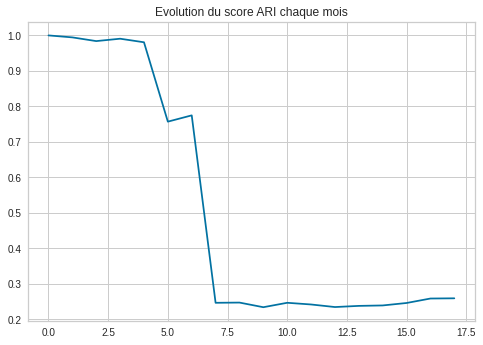

In [31]:
# Représentation graphique
ARIplt = [1]+ARI
plt.plot(ARIplt)
plt.title('Evolution du score ARI chaque mois')
plt.show()

Si la classification se montre robuste pendant 4 mois, elle évolue de façon considérable au 5e et surtout au 7e mois. La question n'est donc plus de savoir s'il faut re-classifier tous les trimestres ou tous les mois car ce 7e mois correspond en fait au mois de Décembre et donc probablement en grande partie aux achats des fêtes. On peut donc dire qu'il y aurait au minimum une classification spécifique à faire au mois de décembre. Le reste de l'année, soit tous les mois (si on considère l'évolution au 5e mois comme trop importante) soit tous les trimestres dans le cas contraire.

# Conclusion

La nature très agglomérée des observation a fortement influencé le choix de la méthode de clustering, en effet, la technique de proche en proche (DBSCAN) a conduit a une classe regroupant 99% de la population. Le clustering hiérarchique a aussi conduit à une classification inutile où seules deux classes (dont une massive) conservent un nombre significatif d'observations.

Il en résulte que parmi les 3 possibilités étudiées la classification k-Means est la seule à fournir une classification interprétable et utile par le fait que ses 4 classes ont un nombre d'observation significatif. La méthode est également stable, elle est donc retenue.

La maintenance doit tenir compte des effets saisonniers plus importants qu'un effet périodique régulier.

Une nouvelle approche pourrait permettre de prendre en compte plus de variables ou d'en retirer certaines (dépenses par catégorie, fréquence). Des indications plus précises de l'équipe marketing sur leur approche aurait peut-être permis de choisir des variables de façon mieux éclairée et de définir moins arbitrairement le nombre de clusters en fonction de l'utilisation concrête de cette classification.